In [16]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import matplotlib as mpl
import seaborn.apionly as sns
import pcmdpy as ppy
from scipy.stats import multivariate_normal
from tqdm import tqdm_notebook
%matplotlib inline

In [24]:
sns.set_context('notebook')

In [25]:
import pcmdpy as ppy

In [5]:
ppy.gpu_utils.initialize_gpu(n=0)

using given n: 0
Starting SourceModule Code
Getting function
Past the SourceModule code
CUDAC Available


In [6]:
filters = [ppy.instrument.ACS_WFC_F475W(1.0), ppy.instrument.ACS_WFC_F814W(1.0)]
iso_model = ppy.isochrones.Isochrone_Model(filters)

/n/home01/bcook/.conda/envs/my_home/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [11]:
data_pcmd = np.loadtxt('/n/home01/bcook/pixcmd/data/m31_bulge_M2.dat', unpack=True)

In [12]:
driver = ppy.driver.Driver(iso_model, gpu=True)
driver.initialize_data(data_pcmd)

In [10]:
gal = ppy.galaxy.Tau_Model(np.array([0.16, -2.0, 2.25, 2.9]))

In [33]:
logls_0 = []
logls_2 = []
for _ in tqdm_notebook(np.arange(500)):
    mags, _ = driver.simulate(gal, 256)
    pcmd = ppy.utils.make_pcmd(mags)
    logls_0.append(driver.loglike(pcmd, like_mode=0))
    logls_2.append(driver.loglike(pcmd, like_mode=2))
logls_0 = np.array(logls_0)
logls_2 = np.array(logls_2)

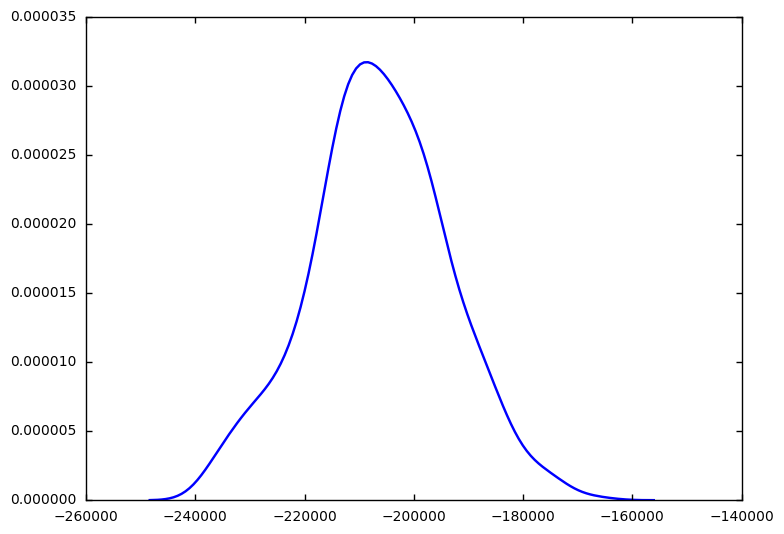

In [34]:
sns.kdeplot(logls_0)
plt.tight_layout()

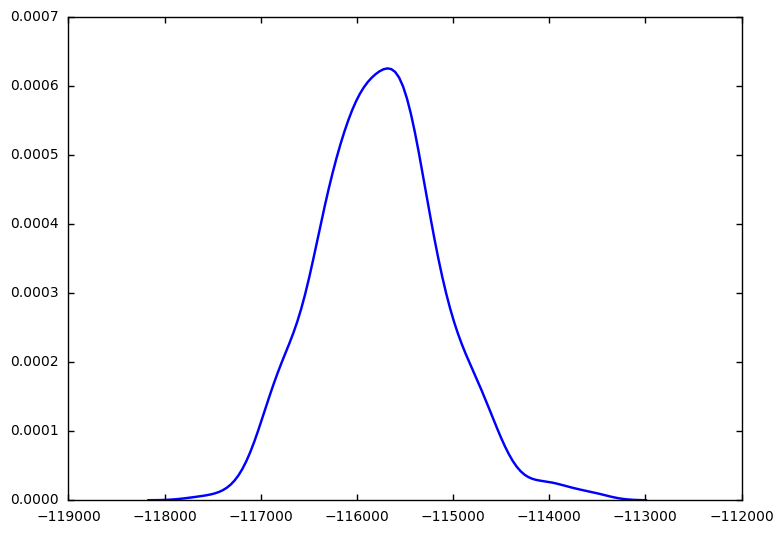

In [35]:
sns.kdeplot(logls_2)
plt.tight_layout()

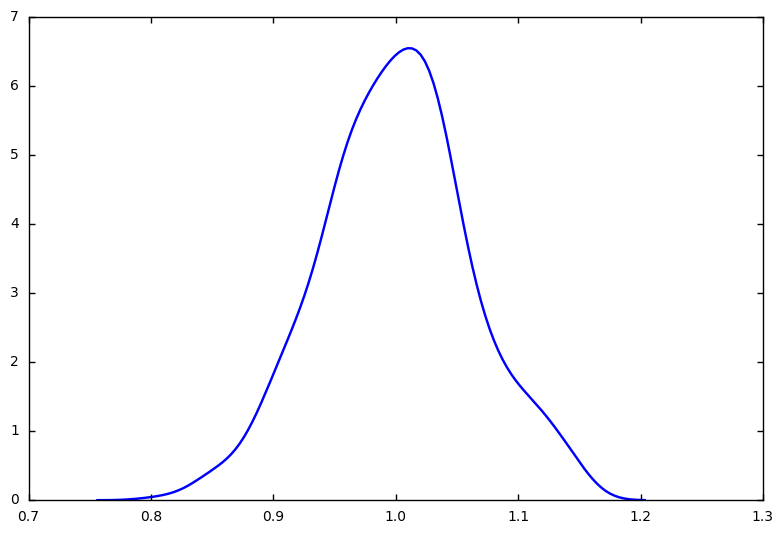

In [36]:
sns.kdeplot(logls_0 / np.mean(logls_0))
plt.tight_layout()

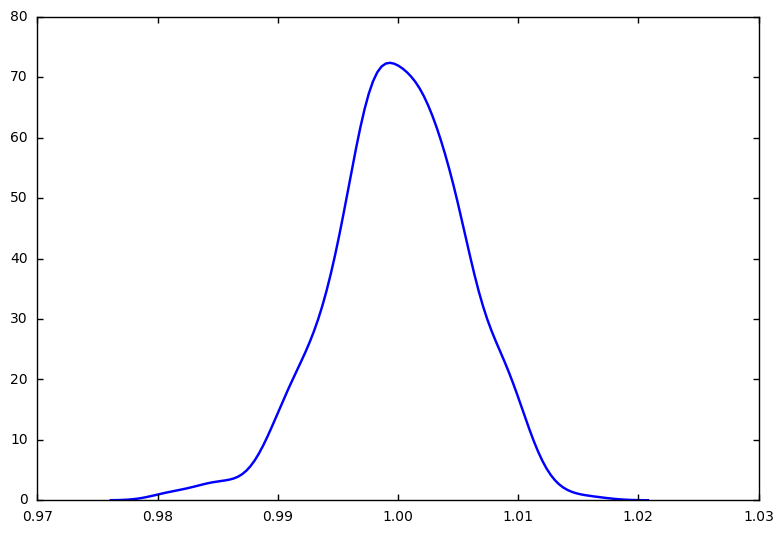

In [37]:
sns.kdeplot(logls_2 / np.mean(logls_2))
plt.tight_layout()

In [3]:
df = pd.read_csv('results/loglike_tests_2.csv')

In [4]:
df.iloc[2::4].log_like = df.iloc[2::4].log_like.values - df.iloc[1::4].log_like.values

/Users/bcook/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
df

N_scale  full_MIST  like_mode  log_like   lum_cut
0          128       True          0 -741610.0       inf
1          128       True          1   -6819.2       inf
2          128       True          2   -8134.8       inf
3          128       True          3 -703850.0       inf
4          128       True          0 -707270.0       inf
5          128       True          1   -3869.2       inf
6          128       True          2  -28858.8       inf
7          128       True          3 -672950.0       inf
8          128       True          0 -786730.0       inf
9          128       True          1   -9561.6       inf
10         128       True          2   -8852.4       inf
11         128       True          3 -749230.0       inf
12         128       True          0 -718090.0       inf
13         128       True          1   -3888.2       inf
14         128       True          2  -17138.8       inf
15         128       True          3 -683810.0       inf
16         128       True          0 -677920.0       inf
17         128       True          1   -6157.5       inf
18         128       True          2    -844.4       inf
19         128       True          3 -636040.0       inf
20         128       True          0 -766830.0       inf
21         128       True          1   -5036.1       inf
22         128       True          2  -17705.9       inf
23         128       True          3 -732140.0       inf
24         128       True          0 -725320.0       inf
25         128       True          1   -3772.7       inf
26         128       True          2  -31812.3       inf
27         128       True          3 -691770.0       inf
28         128       True          0 -747300.0       inf
29         128       True          1   -4127.4       inf
...        ...        ...        ...       ...       ...
27970     2048      False          2     -11.8  3.000000
27971     2048      False          3 -423530.0  3.000000
27972     2048      False          0 -448990.0  3.000000
27973     2048      False          1   -4779.4  3.000000
27974     2048      False          2      -4.0  3.000000
27975     2048      False          3 -423200.0  3.000000
27976     2048      False          0 -449040.0  3.000000
27977     2048      False          1   -4847.6  3.000000
27978     2048      False          2      -5.8  3.000000
27979     2048      False          3 -423240.0  3.000000
27980     2048      False          0 -449030.0  3.000000
27981     2048      False          1   -4831.1  3.000000
27982     2048      False          2      -3.2  3.000000
27983     2048      False          3 -423240.0  3.000000
27984     2048      False          0 -448960.0  3.000000
27985     2048      False          1   -4518.4  3.000000
27986     2048      False          2      -2.3  3.000000
27987     2048      False          3 -423130.0  3.000000
27988     2048      False          0 -449080.0  3.000000
27989     2048      False          1   -5002.3  3.000000
27990     2048      False          2      -5.3  3.000000
27991     2048      False          3 -423300.0  3.000000
27992     2048      False          0 -449040.0  3.000000
27993     2048      False          1   -5079.5  3.000000
27994     2048      False          2      -2.2  3.000000
27995     2048      False          3 -423270.0  3.000000
27996     2048      False          0 -448970.0  3.000000
27997     2048      False          1   -4544.4  3.000000
27998     2048      False          2      -1.6  3.000000
27999     2048      False          3 -423190.0  3.000000

[28000 rows x 5 columns]

In [6]:
df.lum_cut.unique()

array([   inf,  1000.,   300.,   100.,    30.,    10.,     3.])

In [8]:
def frac_std(x):
    return np.std(x) / np.abs(np.mean(x))

In [9]:
df.columns

Index([u'N_scale', u'full_MIST', u'like_mode', u'log_like', u'lum_cut'], dtype='object')

In [10]:
sigs = df.groupby(['like_mode', 'full_MIST', 'N_scale', 'lum_cut']).agg(np.std)

In [11]:
sigs.head()

log_like
like_mode full_MIST N_scale lum_cut              
0         False     128     3.0       4110.711648
                            10.0      7008.934485
                            30.0      8323.116634
                            100.0     9879.618528
                            300.0    19455.540233

In [101]:
sigs.loc[0].loc[False].log_like.unstack()

lum_cut  3.000000     10.000000    30.000000    100.000000    300.000000   \
N_scale                                                                     
128      4110.711648  7008.934485  8323.116634  9879.618528  19455.540233   
256      1153.785163  1974.830705  2157.473588  3629.495291   4451.243676   
512       502.863507   528.156275   522.916607  1196.104299    963.675891   
1024      182.349287   180.232033   157.744551   370.138863    547.434153   
2048       81.221732    79.677316    45.394344   204.881119    267.026575   

lum_cut   1000.000000   inf          
N_scale                              
128      16880.167785  29980.008009  
256       4204.829762  14172.744523  
512       1316.317464   4554.212507  
1024       386.884200   1423.284220  
2048       146.953542    506.805194

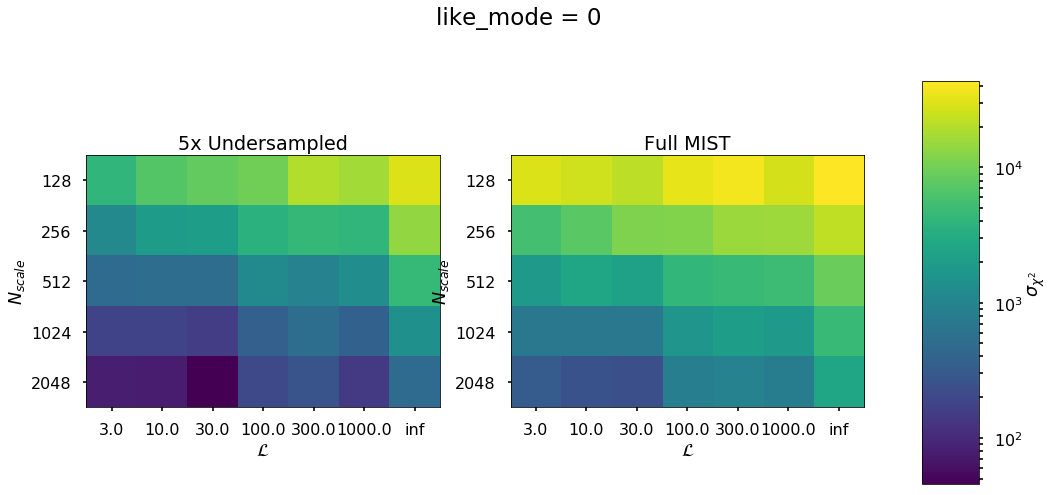

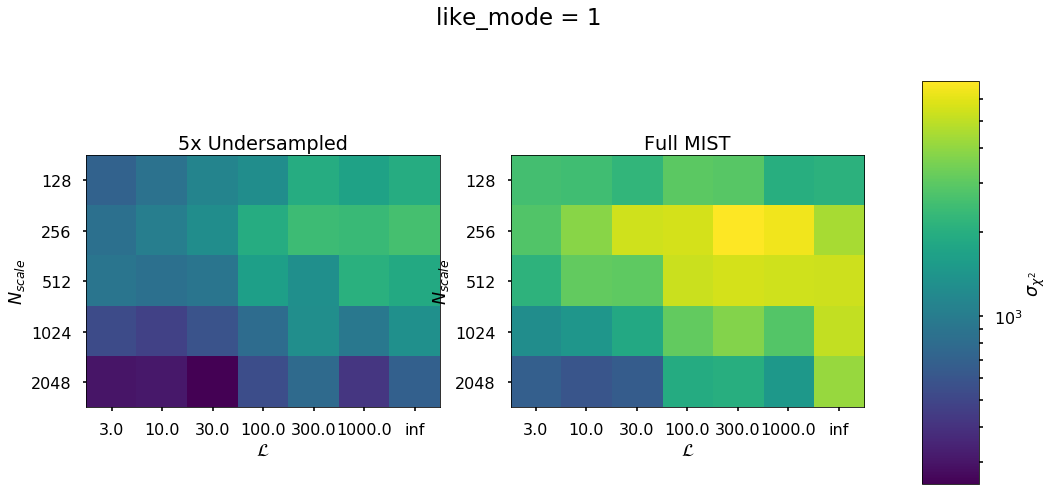

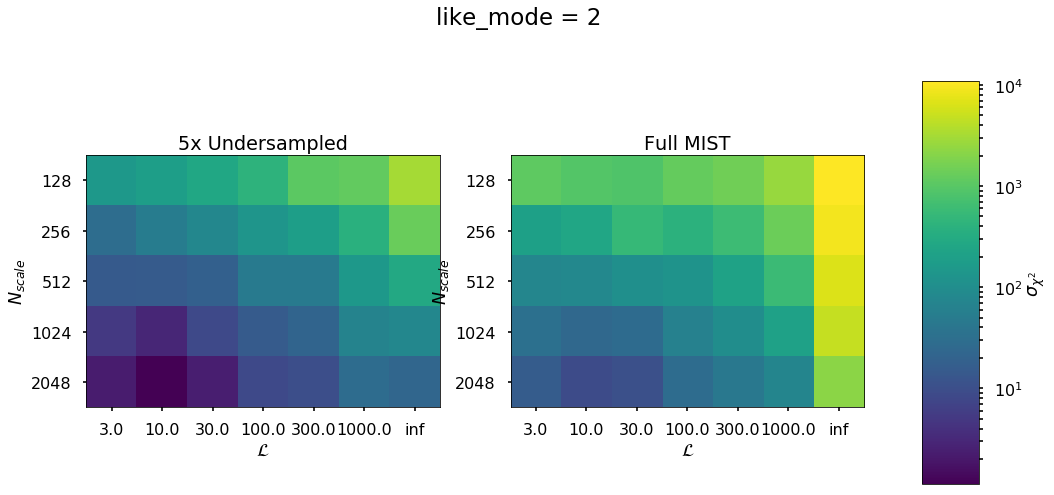

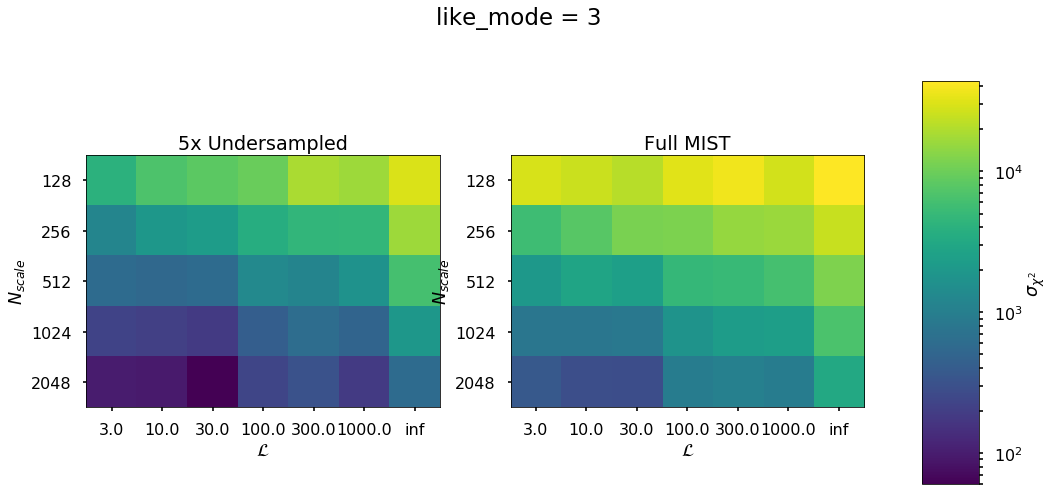

In [102]:
for l in [0, 1, 2, 3]:
    fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
    s = sigs.loc[l]
    n = mpl.colors.LogNorm(vmin=s.values.min(), vmax=s.values.max())
    for f in [False, True]:
        axis = axes[int(f)]
        s = sigs.loc[l].loc[f].log_like.unstack()
        plt.subplot(axis)
        im = plt.imshow(s, norm=n)
        axis.set_ylabel(r'$N_{scale}$')
        axis.set_xlabel(r'$\mathcal{L}$')
        axis.set_xticks(np.arange(0, 7))
        axis.set_yticks(np.arange(0,5))
        axis.set_xticklabels(s.columns.values)
        axis.set_yticklabels(s.index.values)
        if f:
            title = 'Full MIST'
        else:
            title = '5x Undersampled'
        axis.set_title(title)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    plt.colorbar(im,label=r'$\sigma_{\chi^2}$', cax=cbar_ax)
    fig.suptitle('like_mode = %d'%l)
#     fig.tight_layout()

In [13]:
df = pd.read_csv('results/full_loglike_test.csv')

In [14]:
#remove tests where points were out of the hess diagram
bad_points = (df.like_mode==1)&(df.log_like==0.)
df = df[~bad_points].reset_index()

In [15]:
def make_array(param_string):
    return np.array(param_string.strip('[]').replace('\n','').split()).astype(float)

In [16]:
df.log_like -= 1e-6

In [17]:
df.N_scale = df.N_scale.values.astype(int)
df.like_mode = df.like_mode.values.astype(int)
df['loglog'] = np.log10(np.abs(df.log_like.values))
df['data_params'] = df['data_params'].apply(make_array)
df['model_params'] = df['model_params'].apply(make_array)
df['delta_params'] = df['model_params'].values - df['data_params'].values

In [39]:
Npix_data = []
for a in df.data_params.values:
    if len(a) > 4:
        Npix_data.append(a[-1])
    else:
        Npix_data.append(a[2])
        
Npix_model = []
for a in df.model_params.values:
    if len(a) > 4:
        Npix_model.append(a[-1])
    else:
        Npix_model.append(a[2])
        
df['Npix_data'] = Npix_data
df['Npix_model'] = Npix_model

In [40]:
df.head(400)

index gal_type compare_type  N_scale  MIST_full  like_mode  lum_cut  \
0        0     Full         same      128       True          0      inf   
1        1     Full         same      128       True          1      inf   
2        2     Full         same      128       True          2      inf   
3        3     Full         same      128       True          3      inf   
4        4     Full        close      128       True          0      inf   
5        5     Full        close      128       True          1      inf   
6        6     Full        close      128       True          2      inf   
7        7     Full        close      128       True          3      inf   
8        8     Full      similar      128       True          0      inf   
9        9     Full      similar      128       True          1      inf   
10      10     Full      similar      128       True          2      inf   
11      11     Full      similar      128       True          3      inf   
12      12     Full         rand      128       True          0      inf   
13      13     Full         rand      128       True          1      inf   
14      14     Full         rand      128       True          2      inf   
15      15     Full         rand      128       True          3      inf   
16      16     Full         same      128       True          0      inf   
17      17     Full         same      128       True          1      inf   
18      18     Full         same      128       True          2      inf   
19      19     Full         same      128       True          3      inf   
20      20     Full        close      128       True          0      inf   
21      21     Full        close      128       True          1      inf   
22      22     Full        close      128       True          2      inf   
23      23     Full        close      128       True          3      inf   
24      24     Full      similar      128       True          0      inf   
25      25     Full      similar      128       True          1      inf   
26      26     Full      similar      128       True          2      inf   
27      27     Full      similar      128       True          3      inf   
28      28     Full         rand      128       True          0      inf   
29      29     Full         rand      128       True          1      inf   
..     ...      ...          ...      ...        ...        ...      ...   
370    370     Full         same      512       True          2      inf   
371    371     Full         same      512       True          3      inf   
372    372     Full        close      512       True          0      inf   
373    373     Full        close      512       True          1      inf   
374    374     Full        close      512       True          2      inf   
375    375     Full        close      512       True          3      inf   
376    376     Full      similar      512       True          0      inf   
377    377     Full      similar      512       True          1      inf   
378    378     Full      similar      512       True          2      inf   
379    379     Full      similar      512       True          3      inf   
380    380     Full         rand      512       True          0      inf   
381    381     Full         rand      512       True          1      inf   
382    382     Full         rand      512       True          2      inf   
383    383     Full         rand      512       True          3      inf   
384    384     Full         same      512       True          0      inf   
385    385     Full         same      512       True          1      inf   
386    386     Full         same      512       True          2      inf   
387    387     Full         same      512       True          3      inf   
388    388     Full        close      512       True          0      inf   
389    389     Full        close      512       True          1      inf   
390    390     Full        close      512       True 

In [8]:
fs = np.array([ppy.instrument.Filter.HST_F475W(1.0), ppy.instrument.Filter.HST_F814W(1.0)])
iso_model = ppy.isochrones.Isochrone_Model(fs)

In [9]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [10]:
p0 = df.ix[0].model_params
p1 = df.ix[4].model_params
p2 = df.ix[8].model_params

/Users/bcook/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [11]:
g0 = ppy.galaxy.Galaxy_Model(p0[:-1])
g1 = ppy.galaxy.Galaxy_Model(p1[:-1])
g2 = ppy.galaxy.Galaxy_Model(p2[:-1])

In [105]:
gt = ppy.galaxy.Galaxy_Model(test[:-1])
m, _ = driv.simulate(g0, 128, psf=True, fixed_seed=False, lum_cut=1e1)
t = ppy.utils.make_pcmd(m)

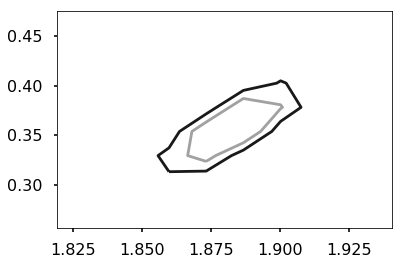

In [108]:
sns.kdeplot(t[0], t[1], n_levels=4, cmap='Greys_r', gridsize=10, alpha=0.9)

In [106]:
means = np.mean(t, axis=1)
cov = np.cov(t)

normal_model = multivariate_normal(mean=means, cov=cov)
np.sum(normal_model.logpdf(t.T))

94141.987276142056

In [104]:
test

array([-0.62796624, -0.49683722,  0.90969453,  0.56241337, -0.16495693,
        1.16847895, -0.08136246,  2.64375228,  3.07509084,  3.21934363])

In [88]:
mags, _ = driv.simulate(g0, 128, psf=True, fixed_seed=False)
pcmd0 = ppy.utils.make_pcmd(mags)

mags, _ = driv.simulate(g1, 128, psf=True, fixed_seed=False)
pcmd1 = ppy.utils.make_pcmd(mags)

mags, _ = driv.simulate(g2, 128, psf=True, fixed_seed=False)
pcmd2 = ppy.utils.make_pcmd(mags)

KeyboardInterrupt: 

In [13]:
pcmd1.shape

(2, 65536)

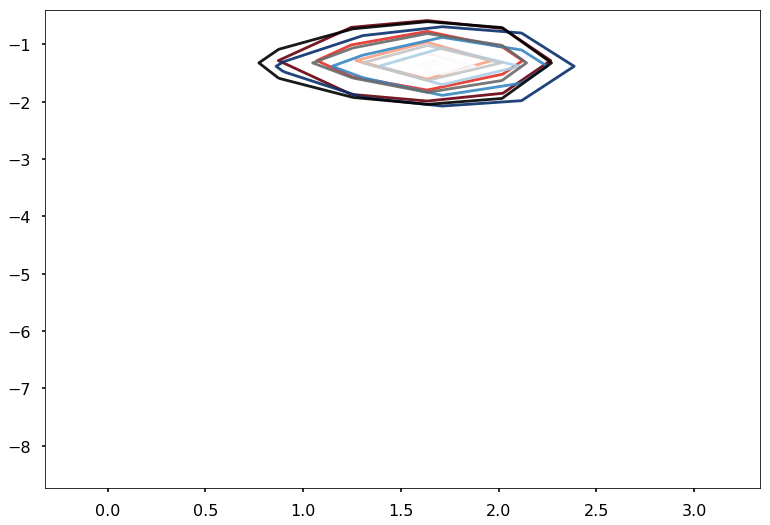

In [14]:
sns.kdeplot(pcmd0[0], pcmd0[1], n_levels=4, cmap='Greys_r', gridsize=10, alpha=0.9)
sns.kdeplot(pcmd1[0], pcmd1[1], n_levels=4, cmap='Reds_r', gridsize=10, alpha=0.9, zorder=-1)
sns.kdeplot(pcmd2[0], pcmd2[1], n_levels=4, cmap='Blues_r', gridsize=10, alpha=0.9, zorder=-1)

/Users/bcook/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


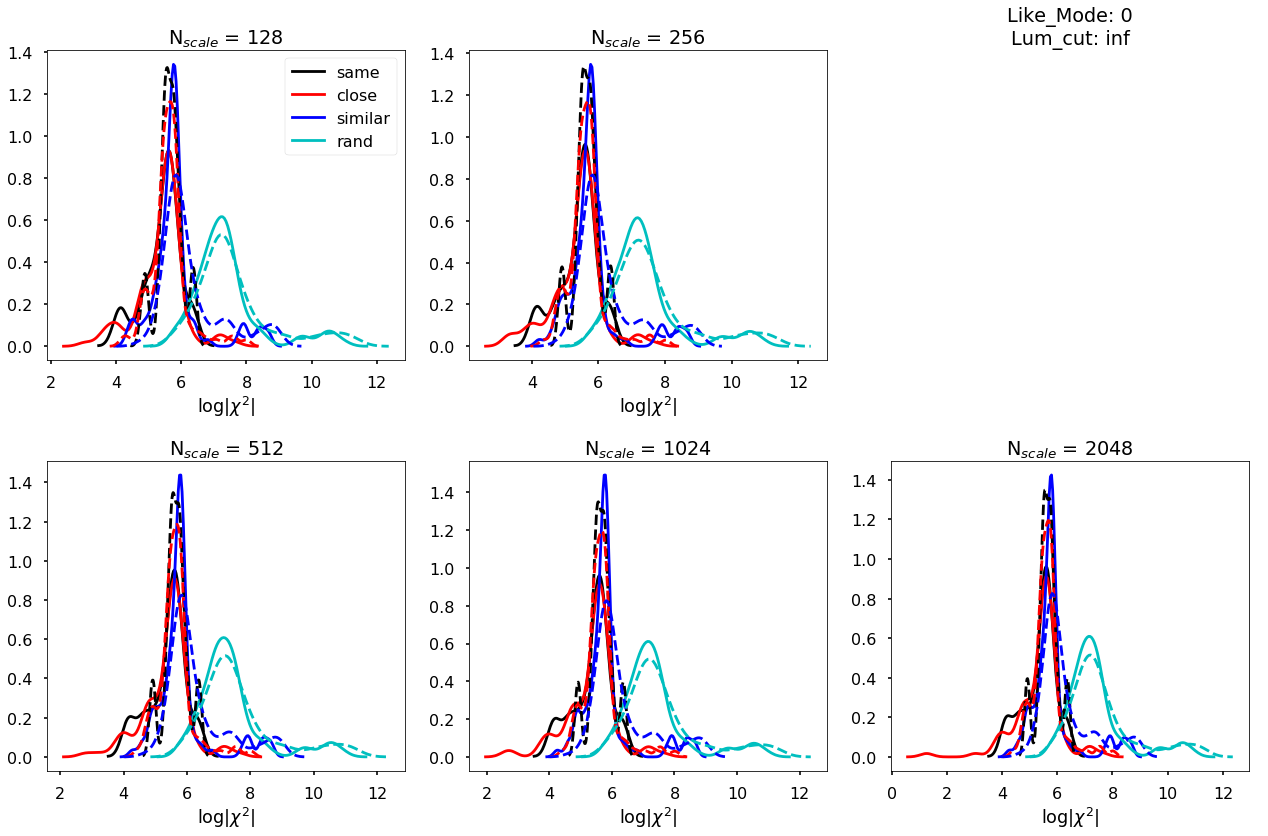

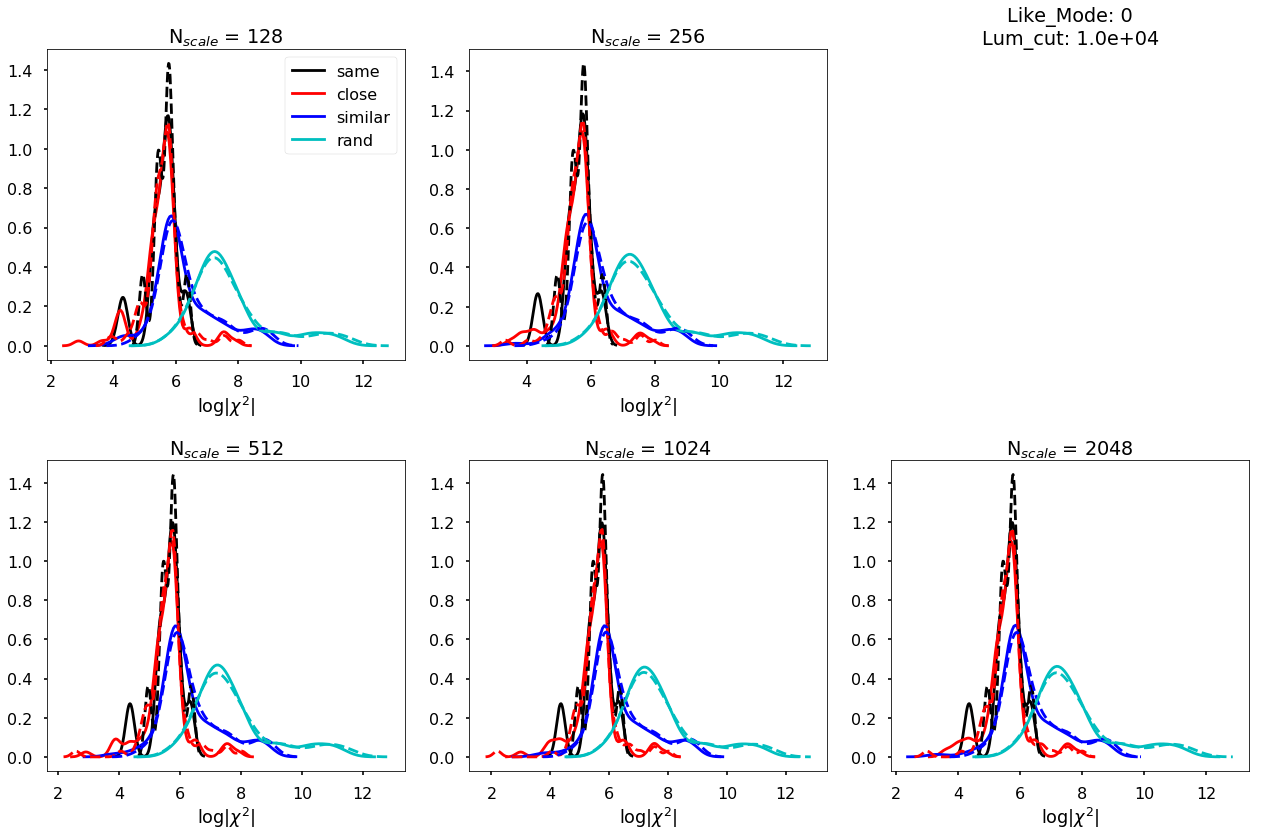

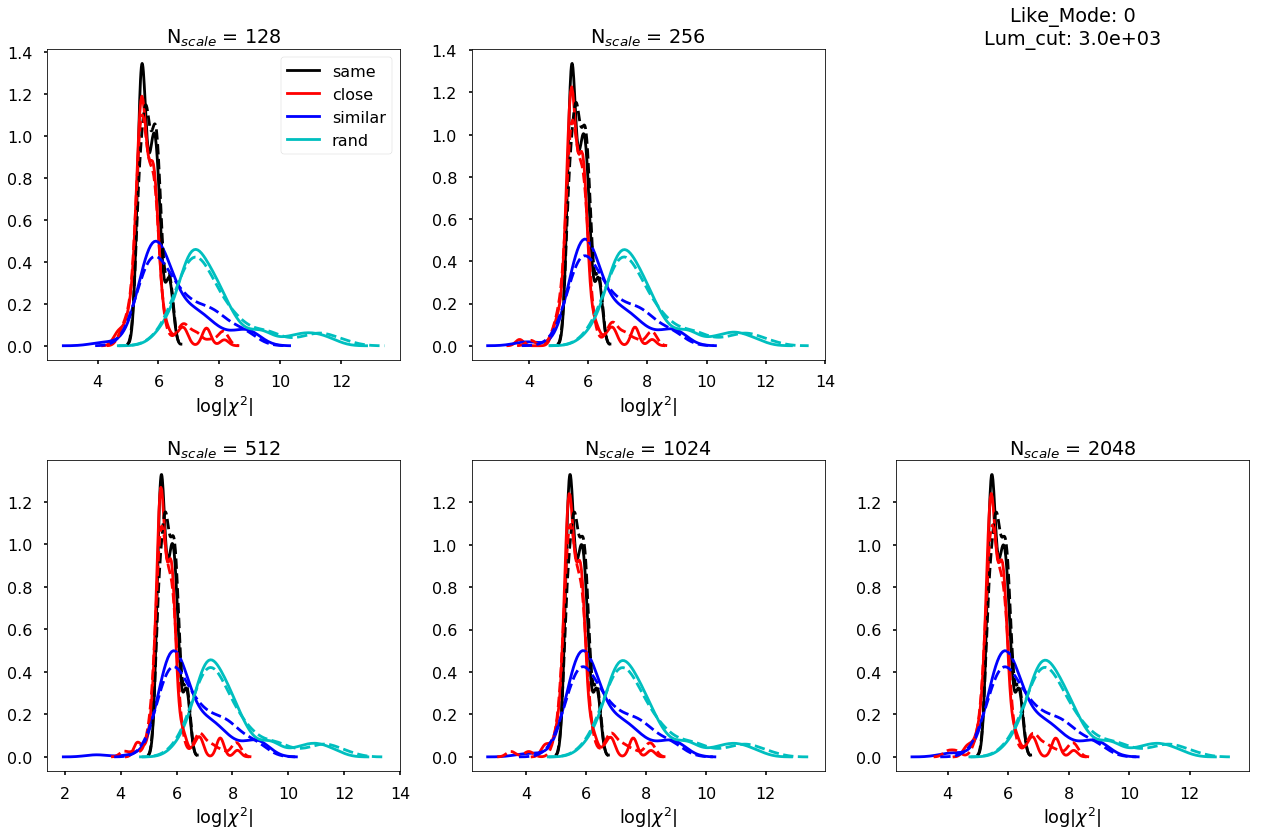

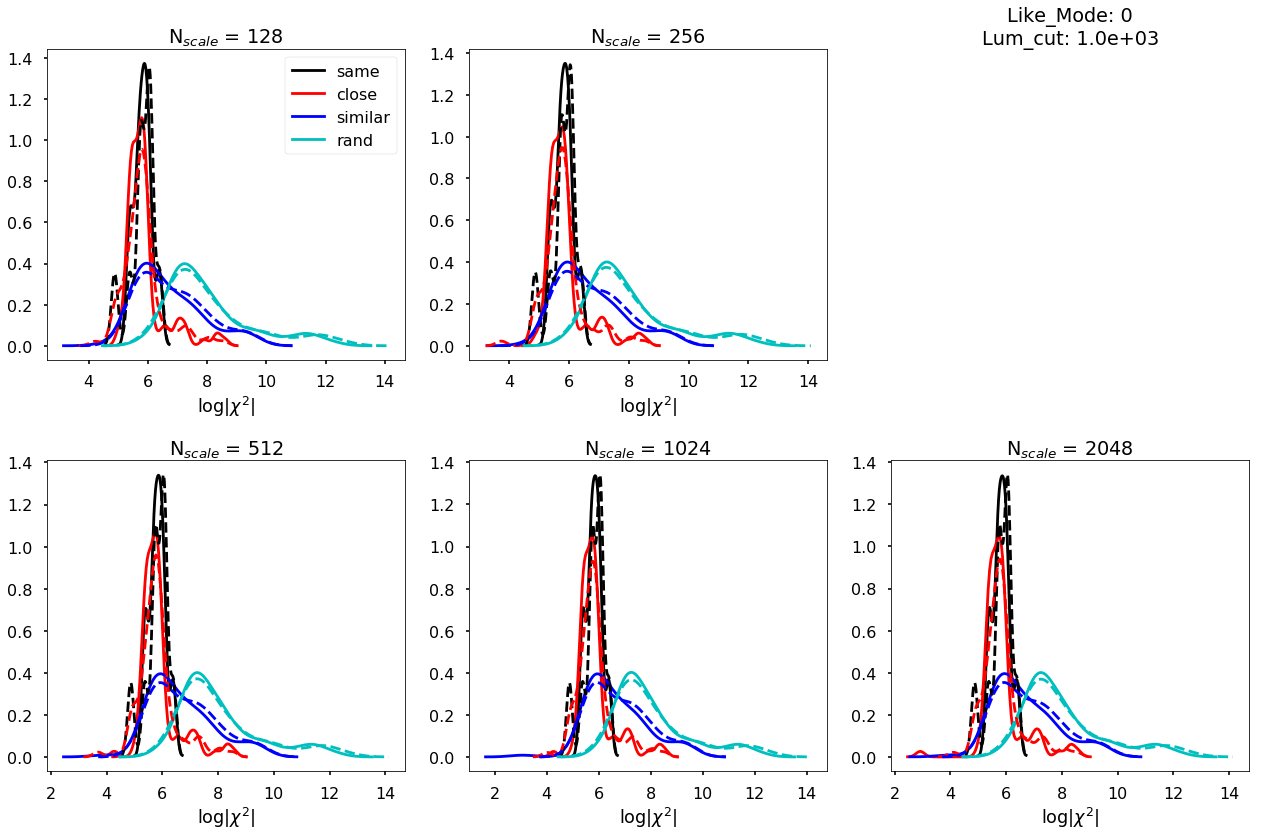

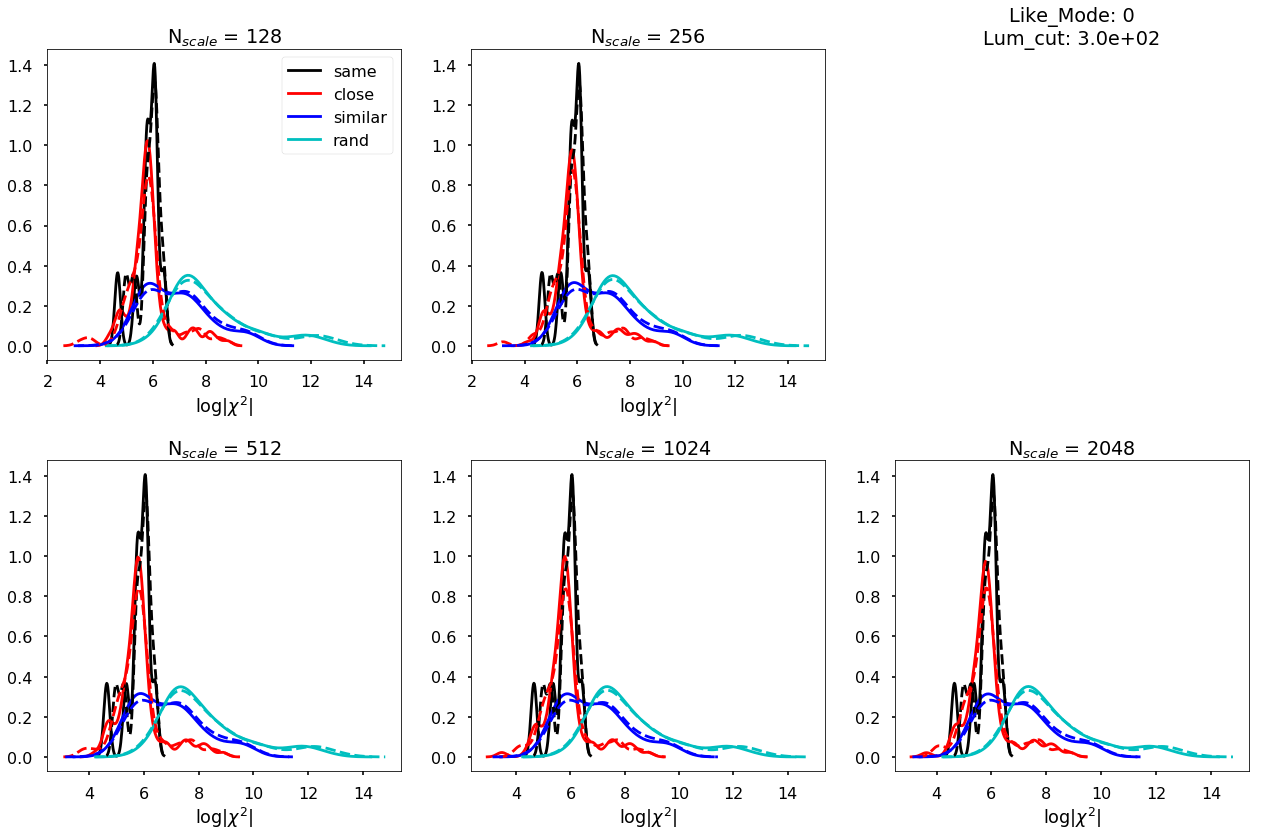

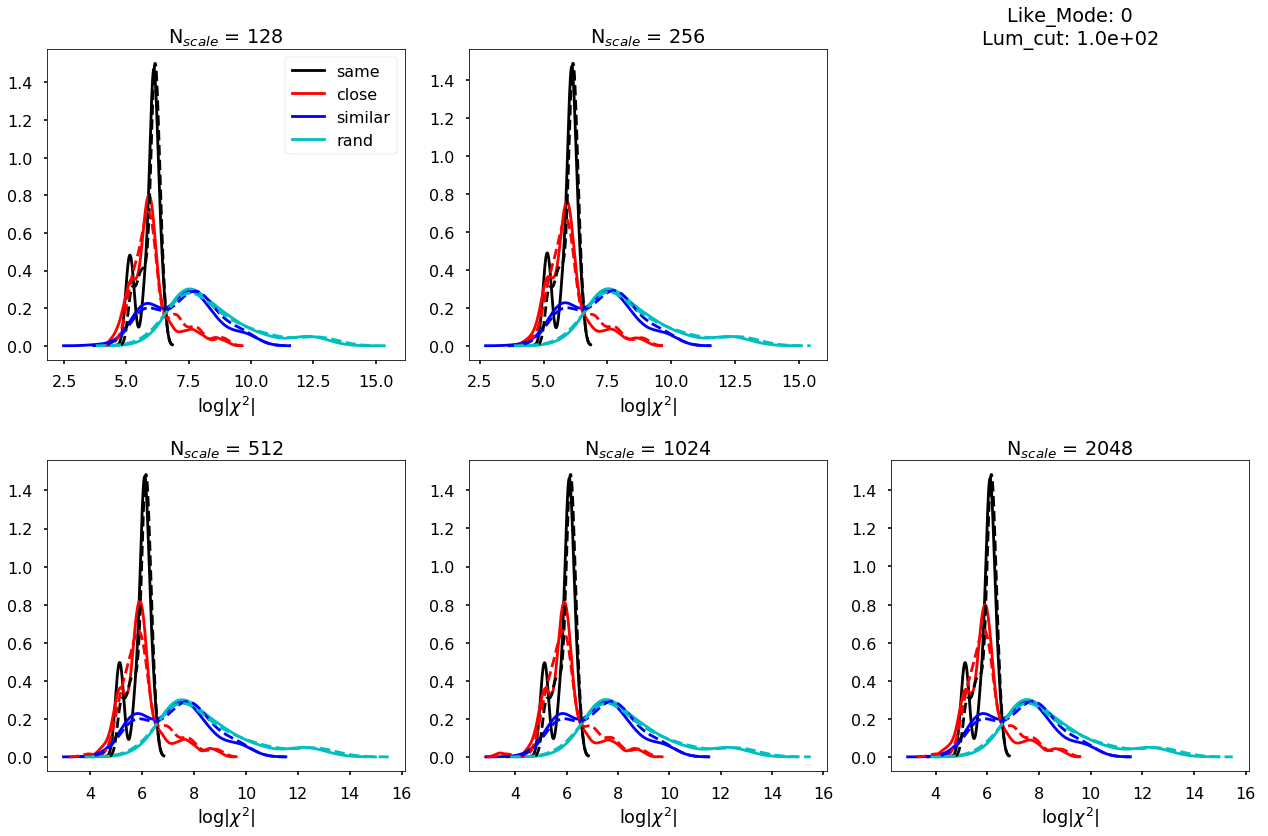

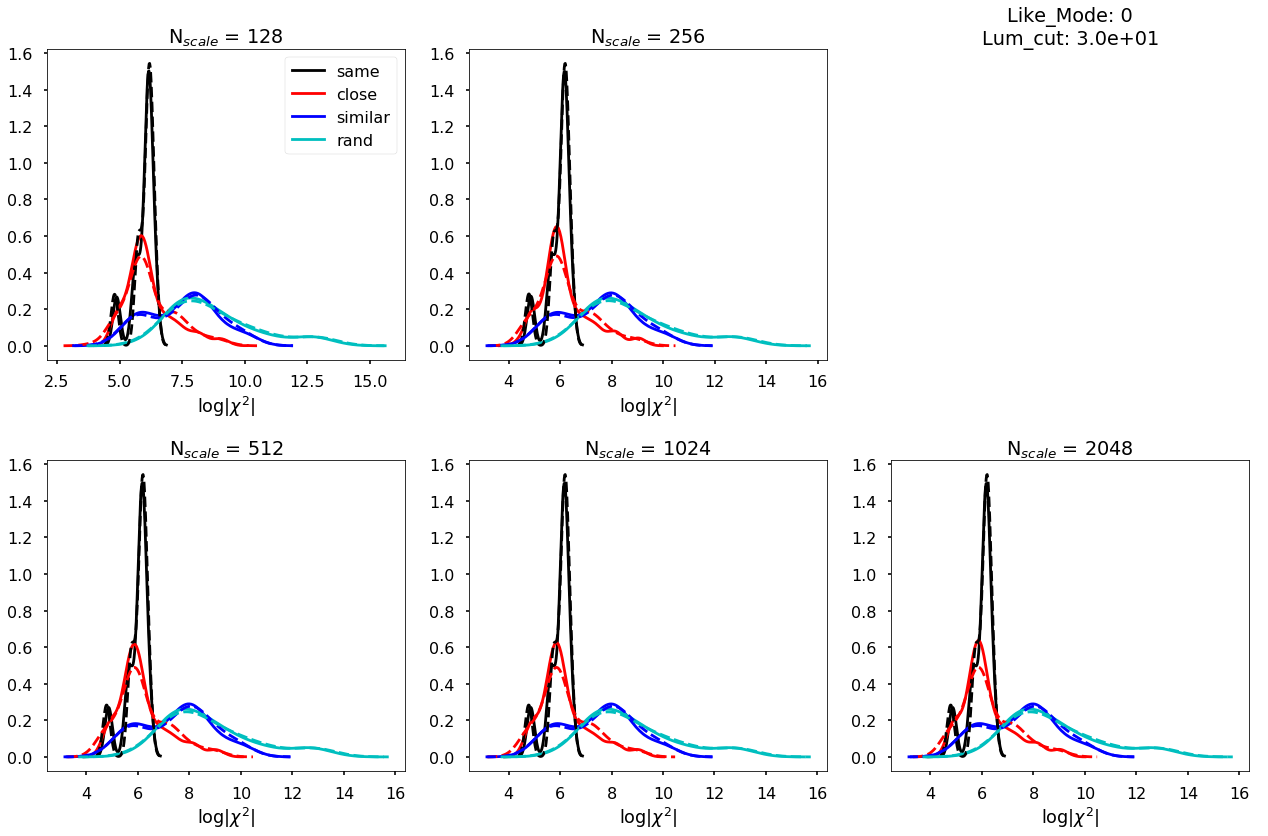

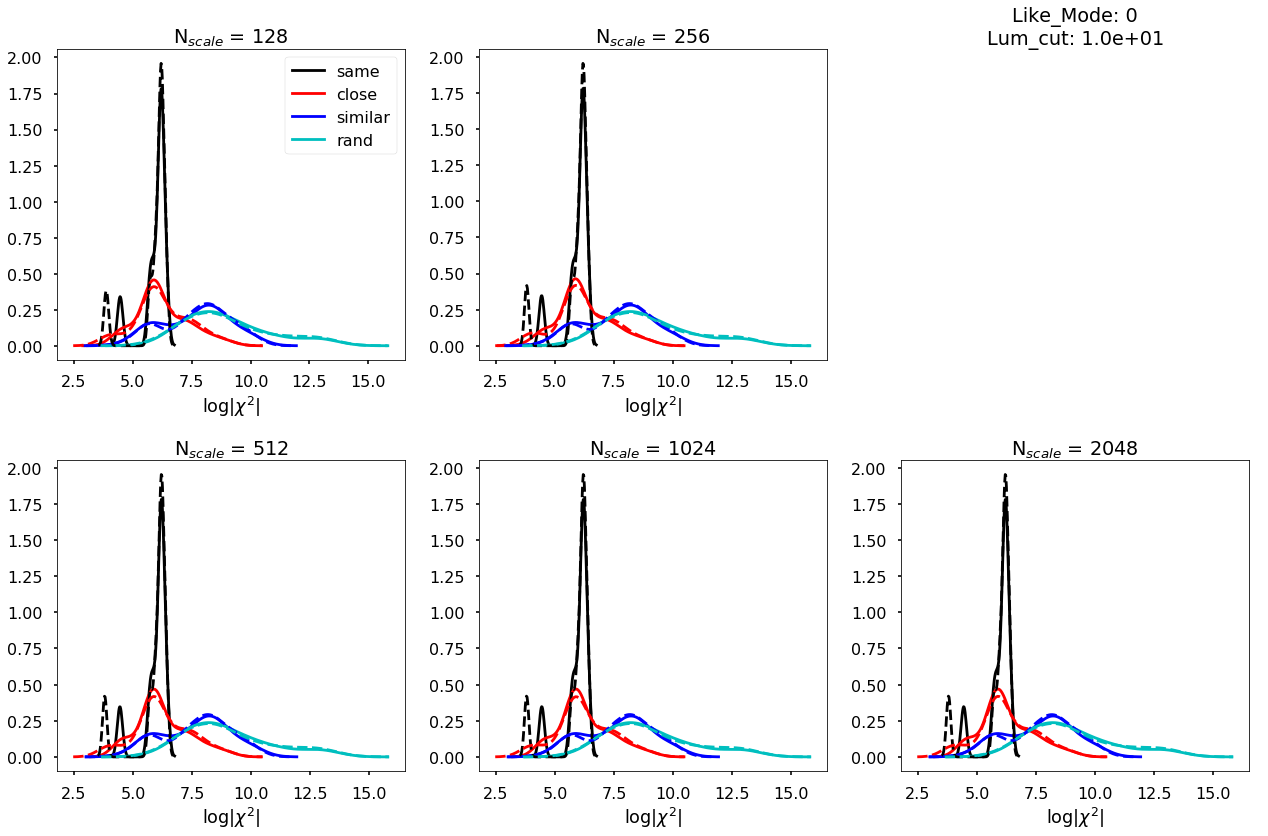

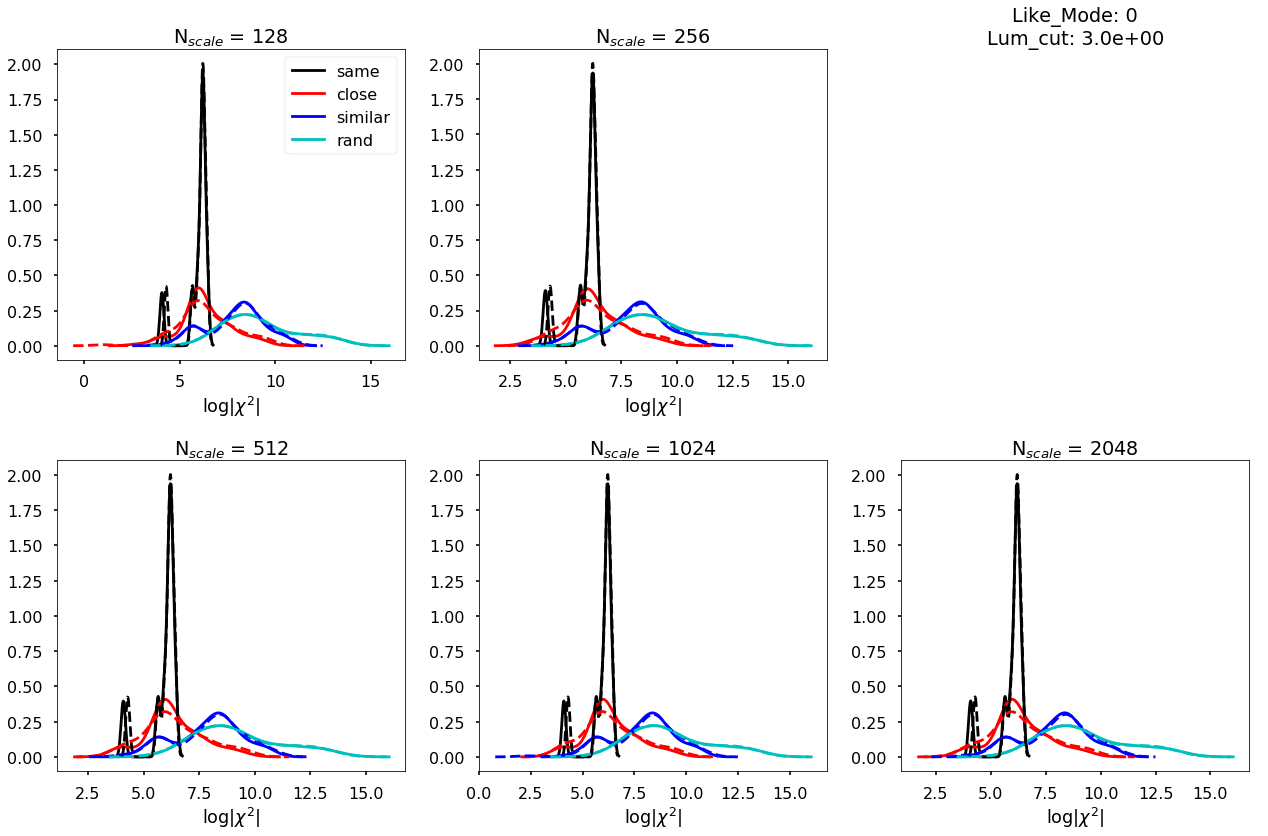

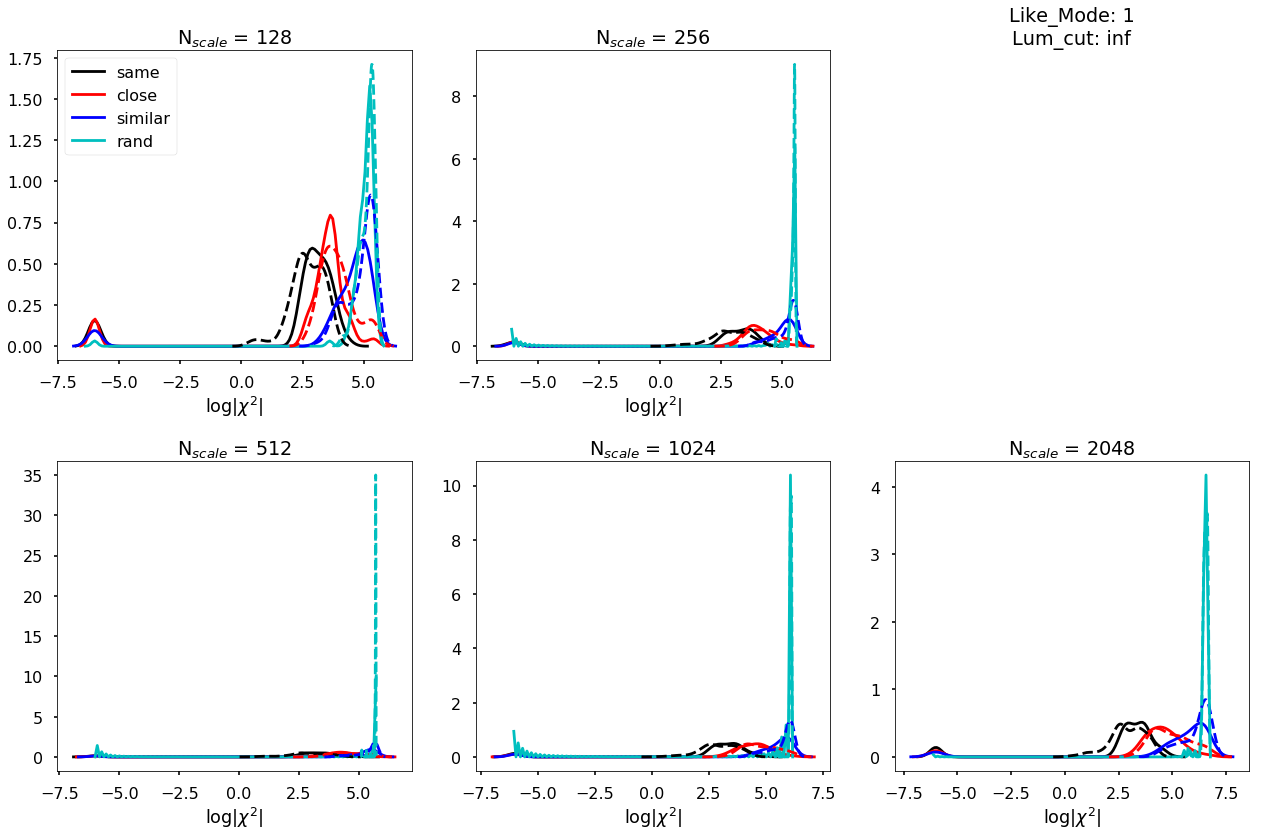

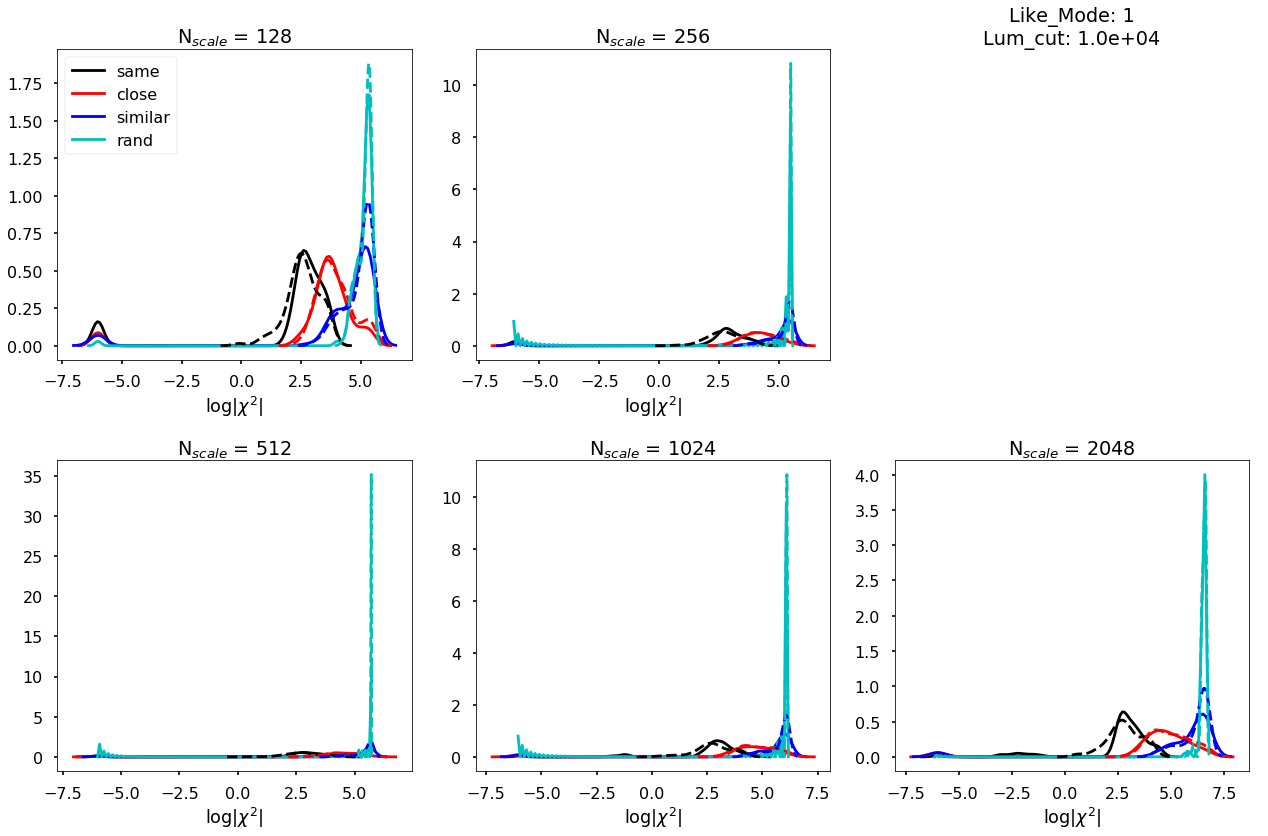

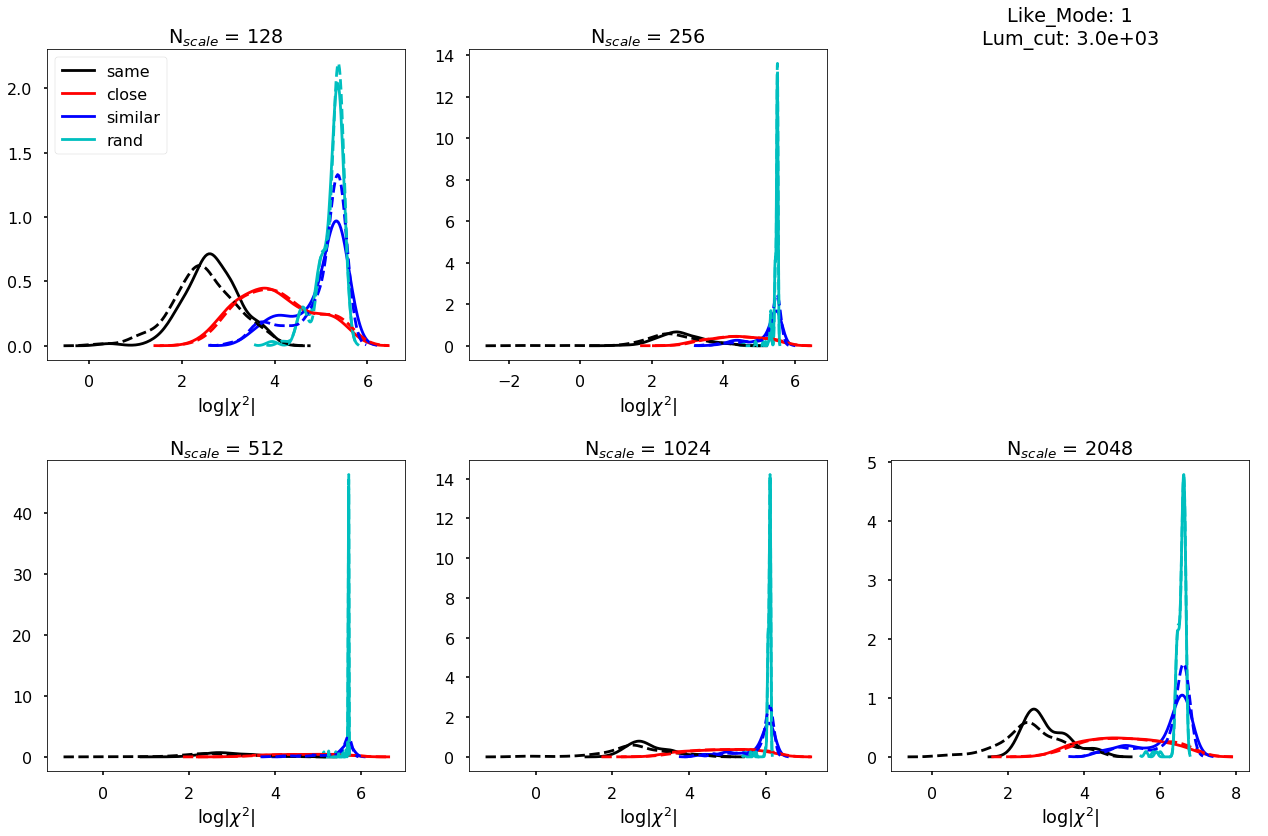

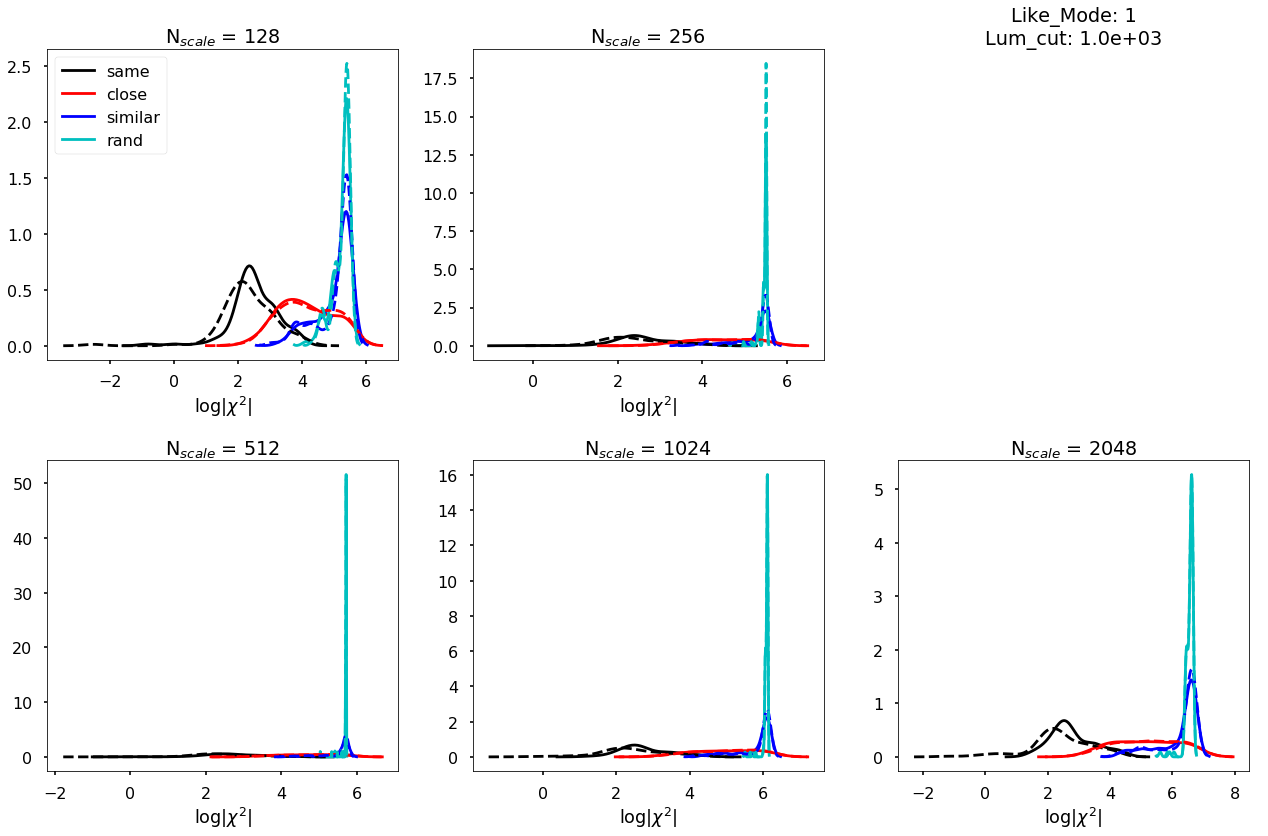

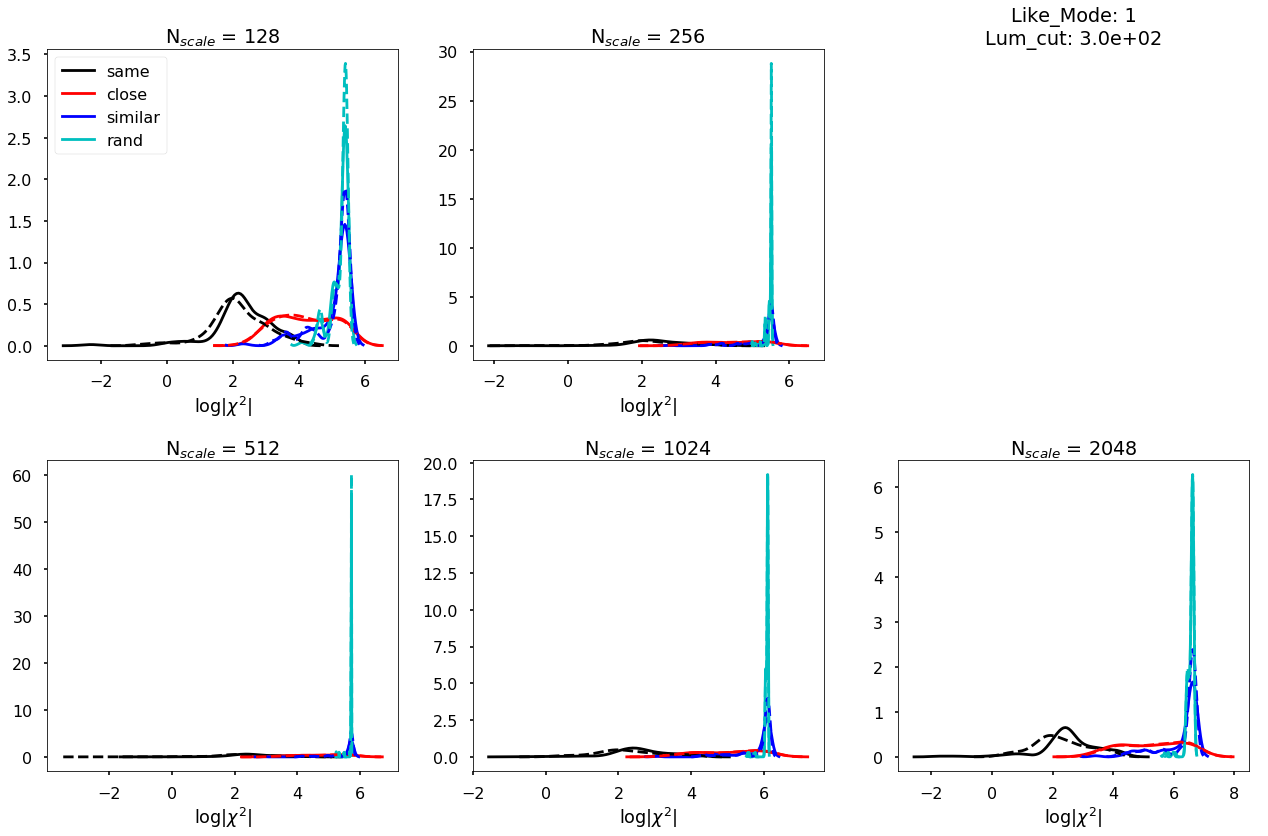

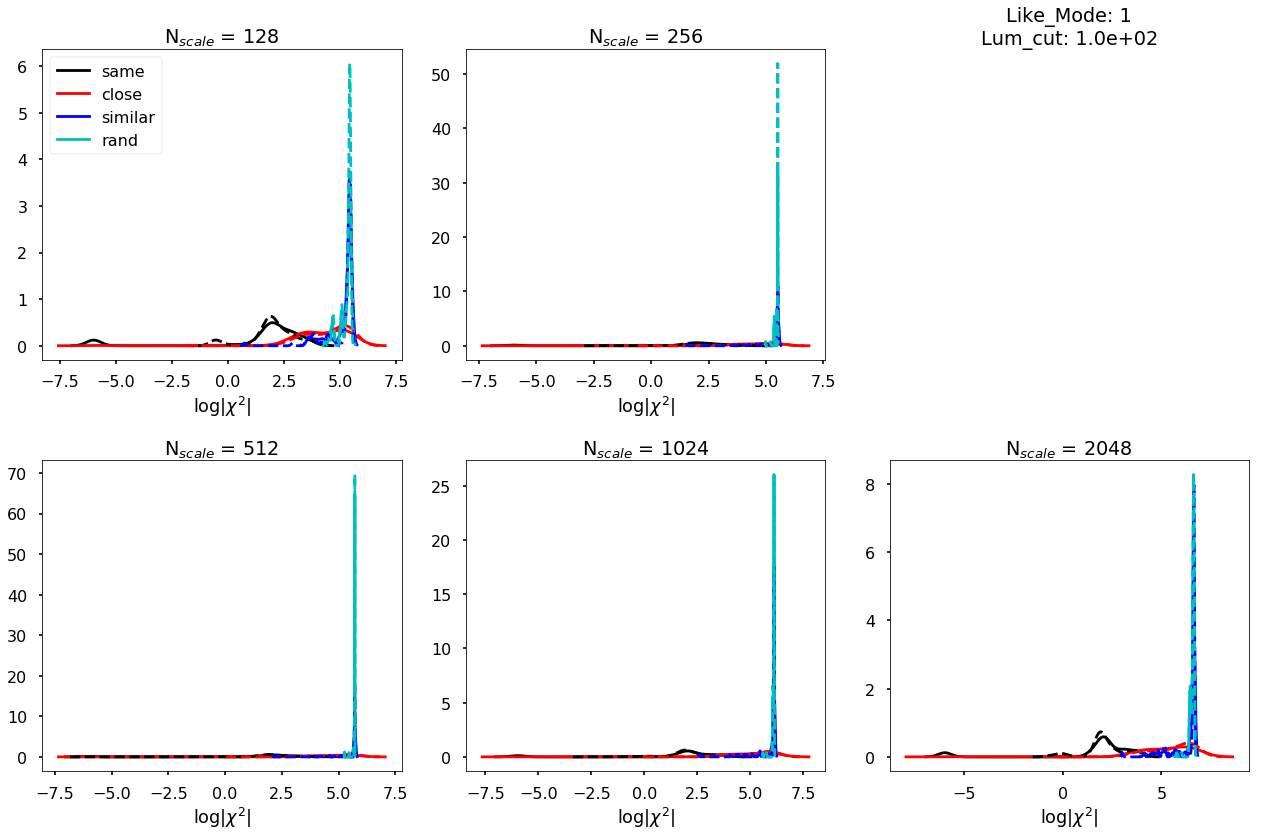

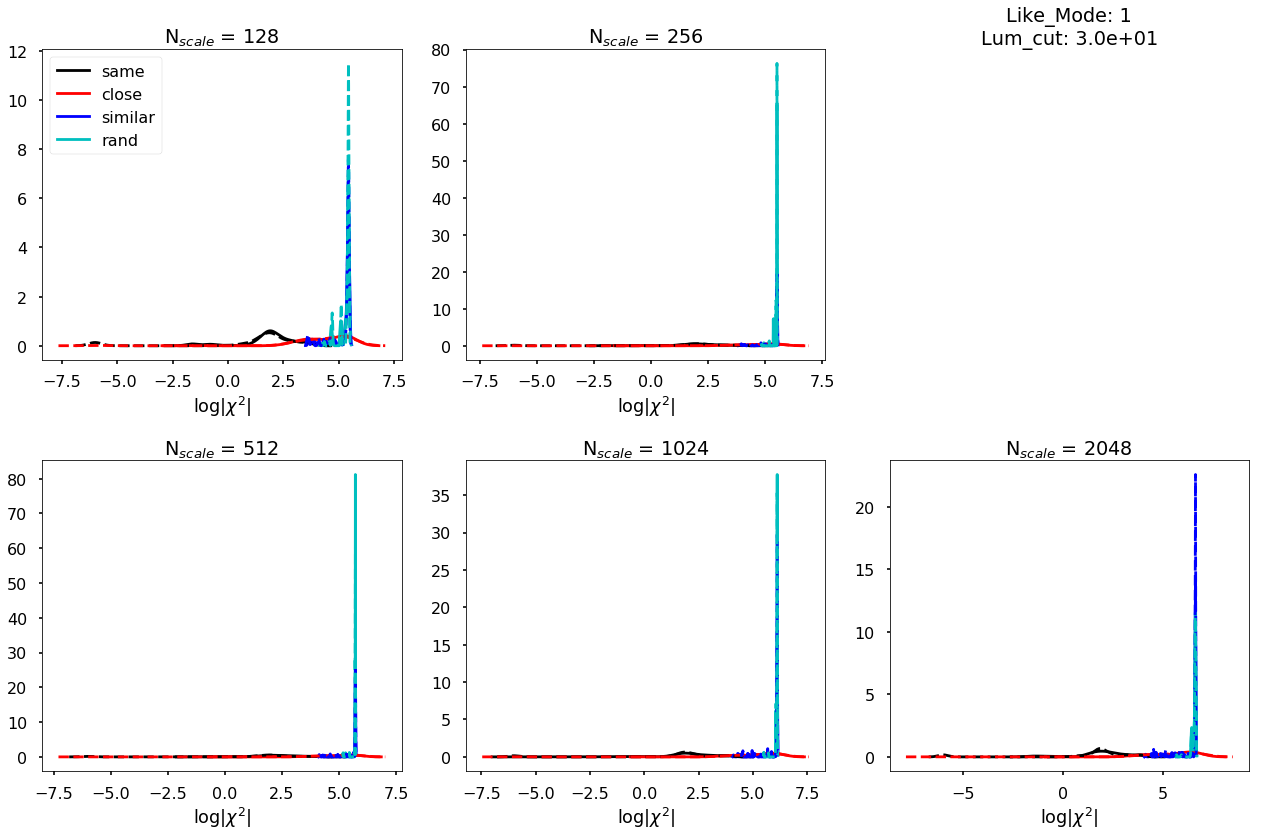

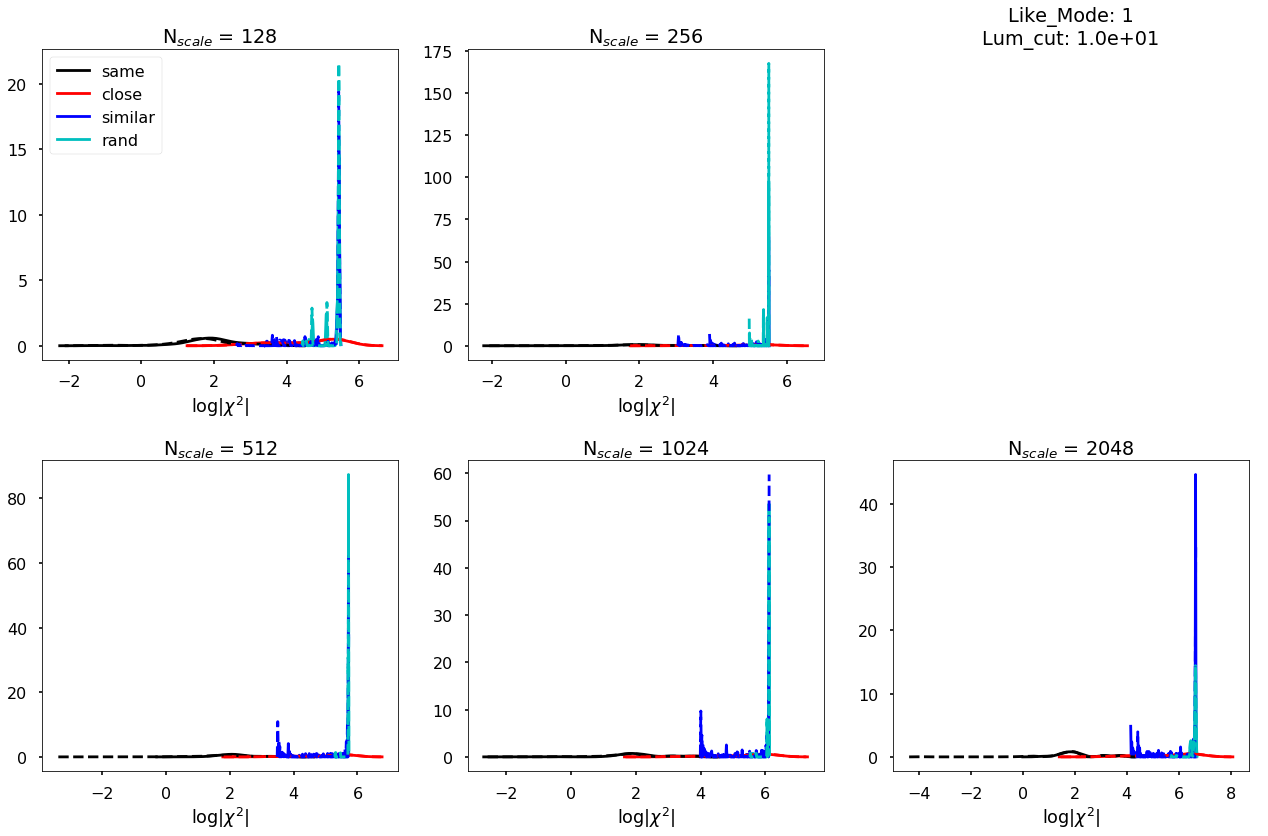

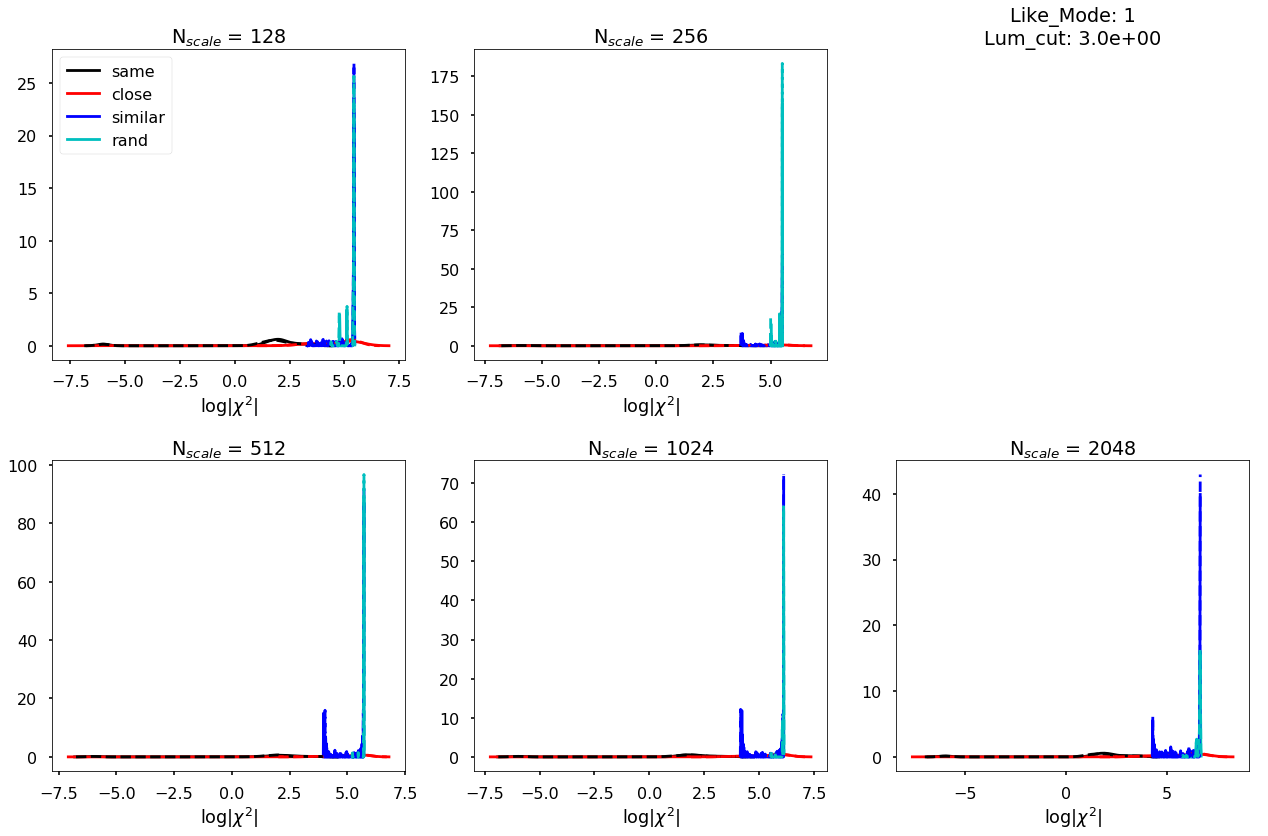

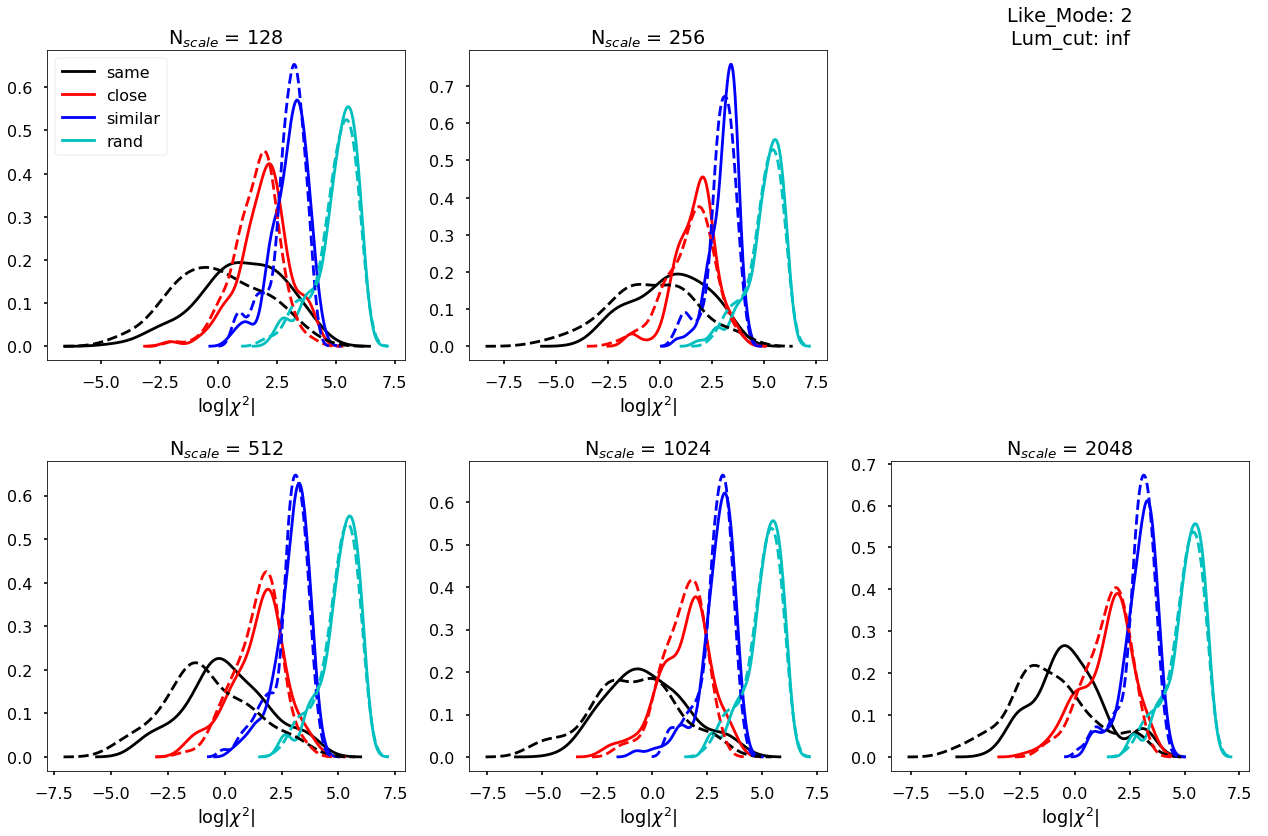

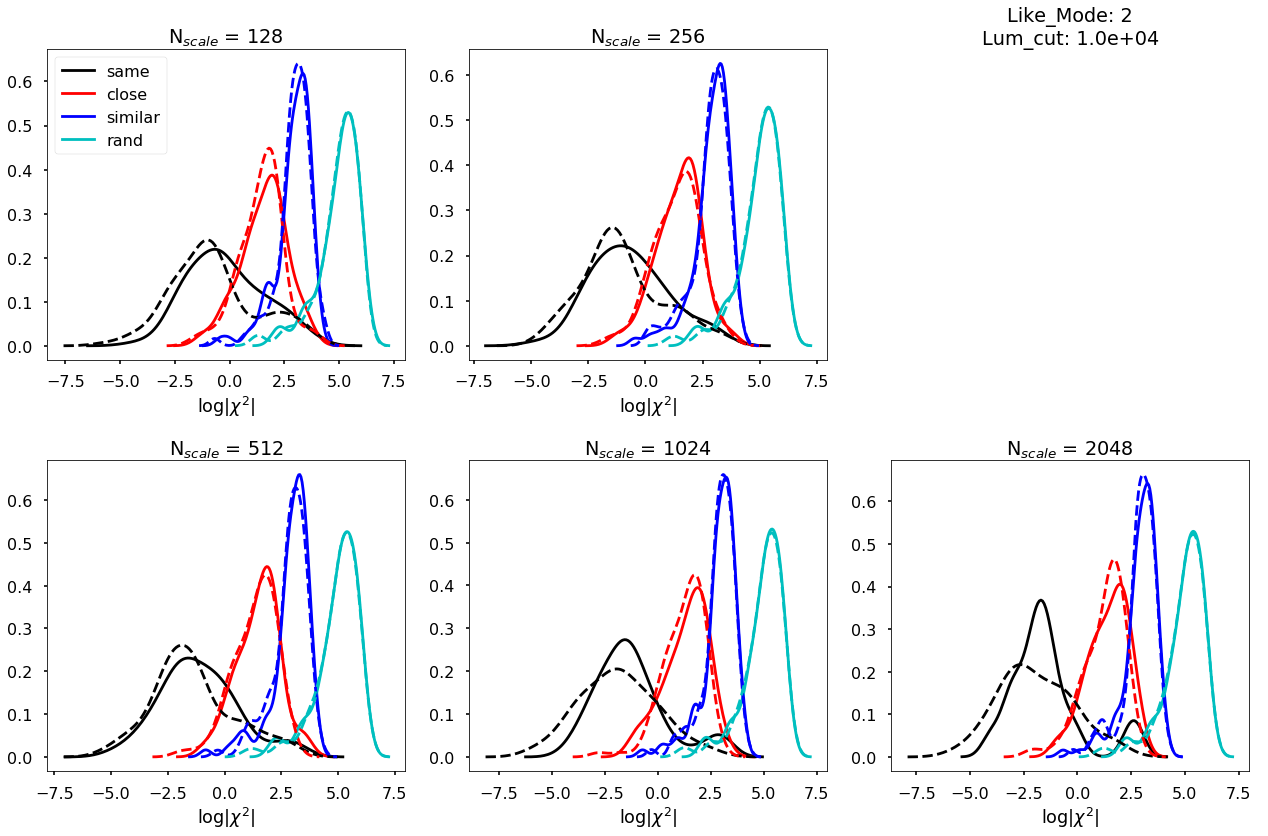

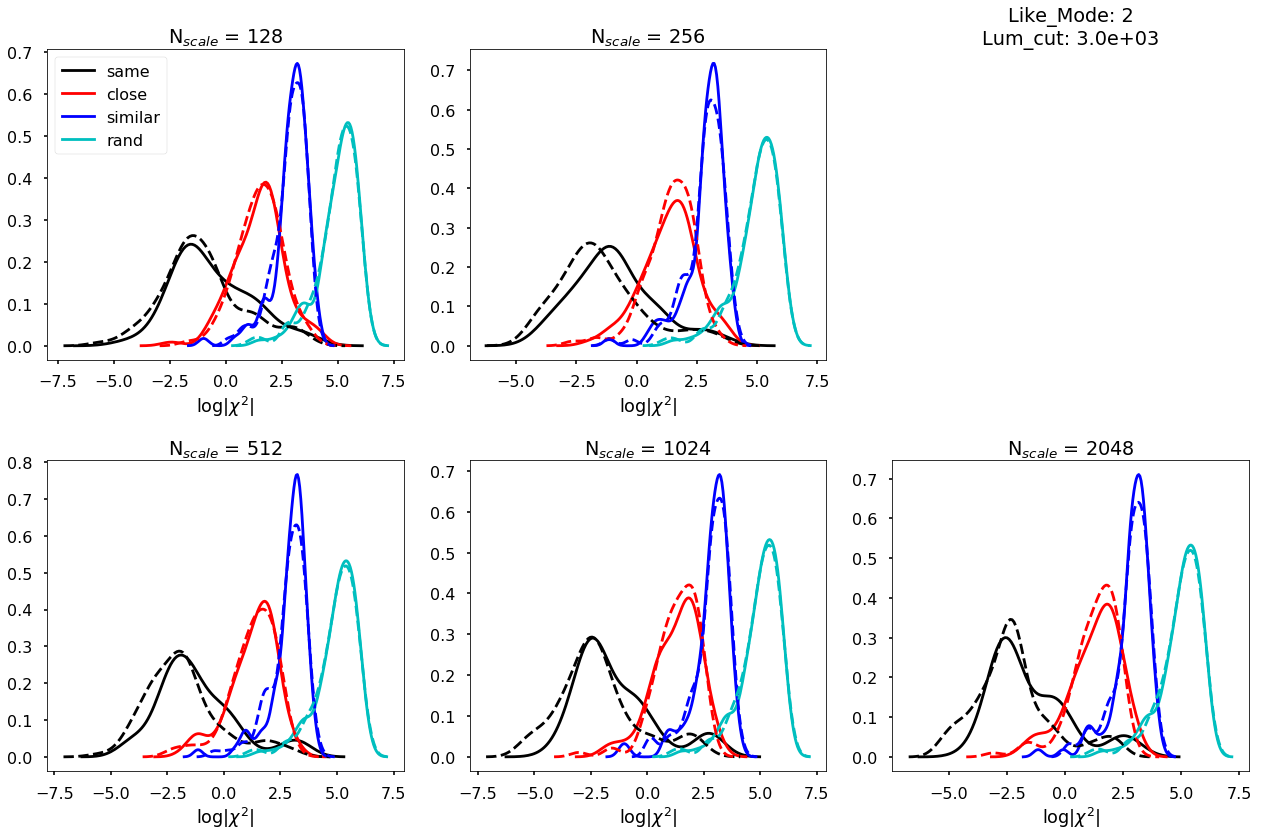

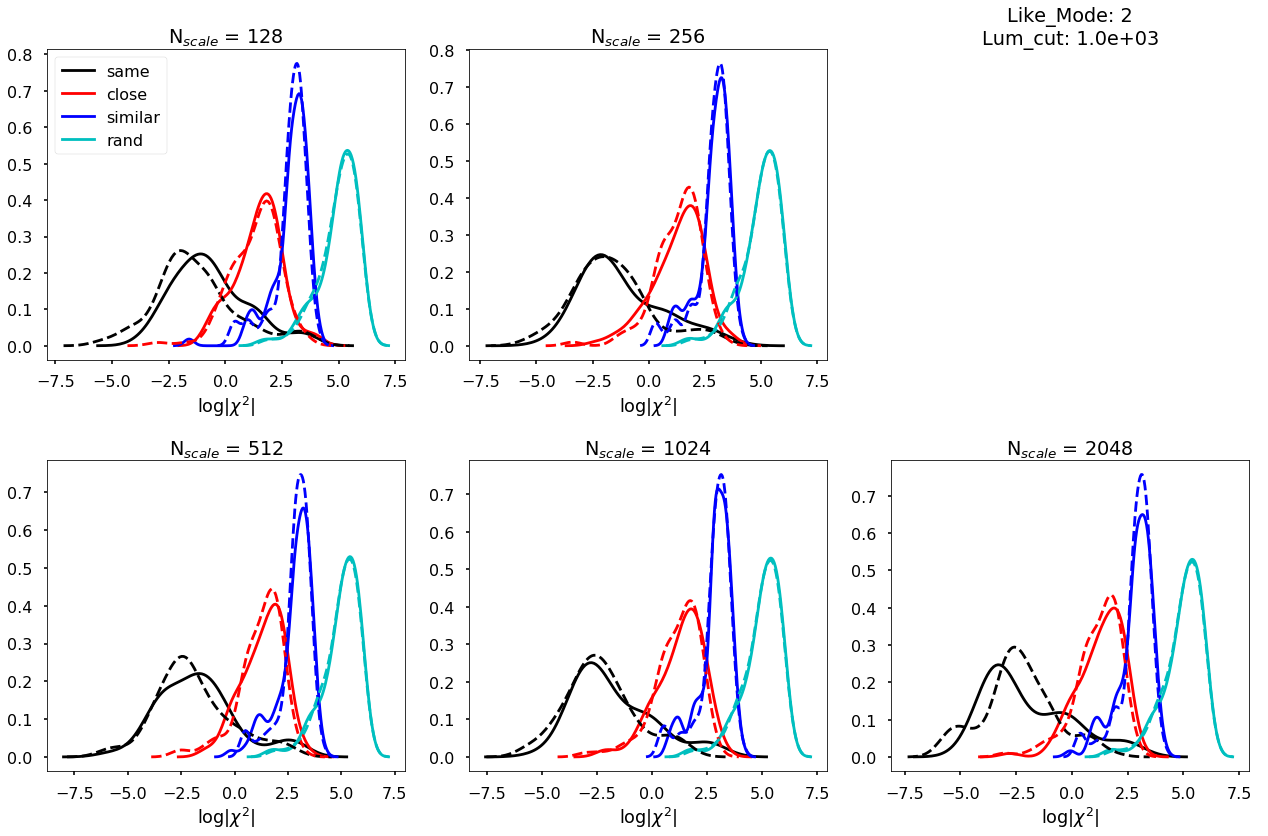

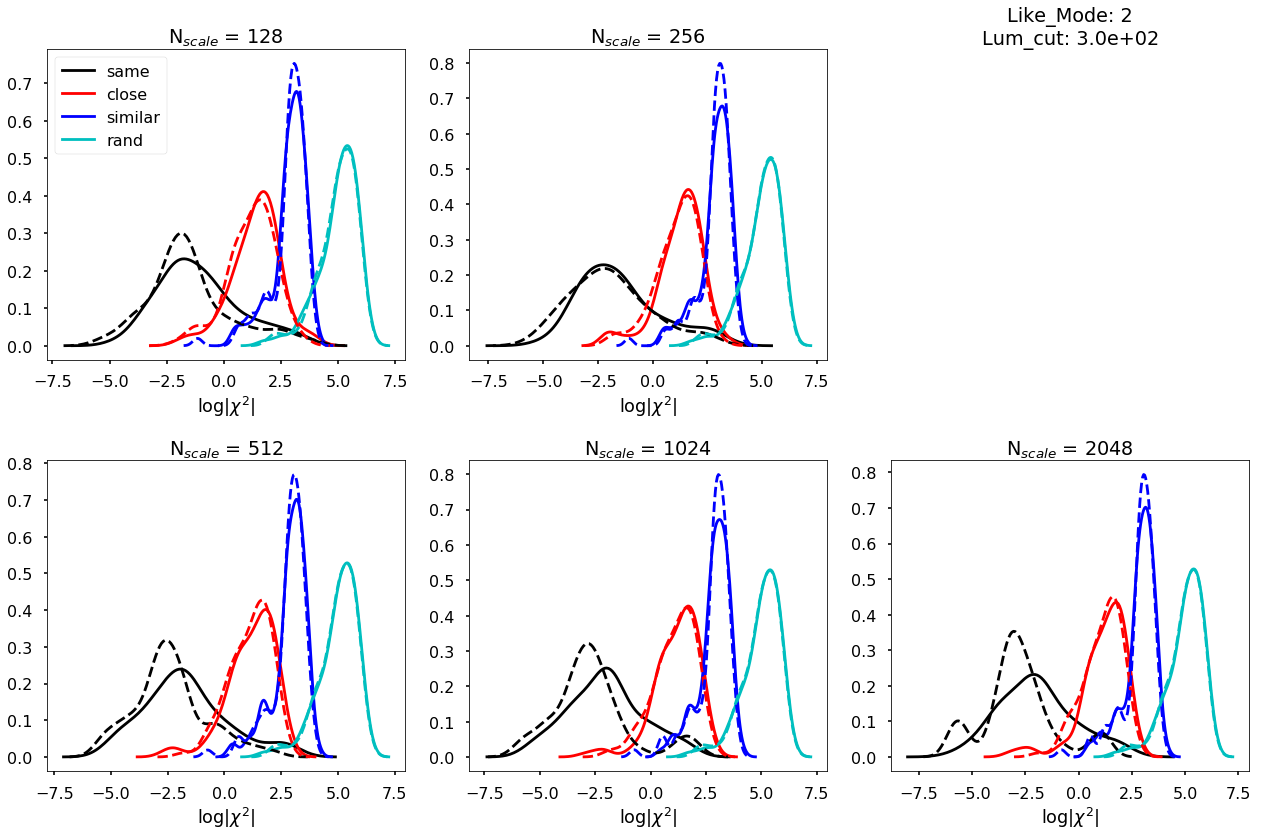

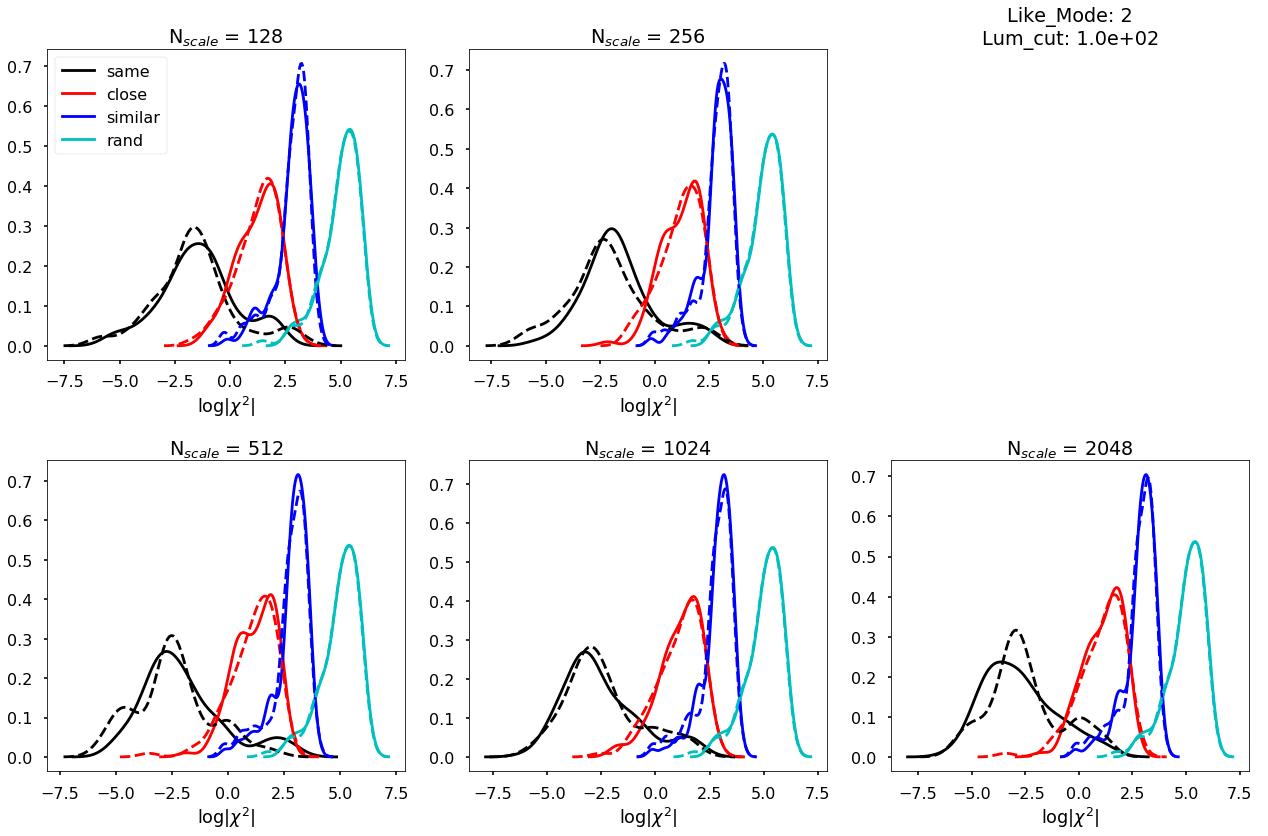

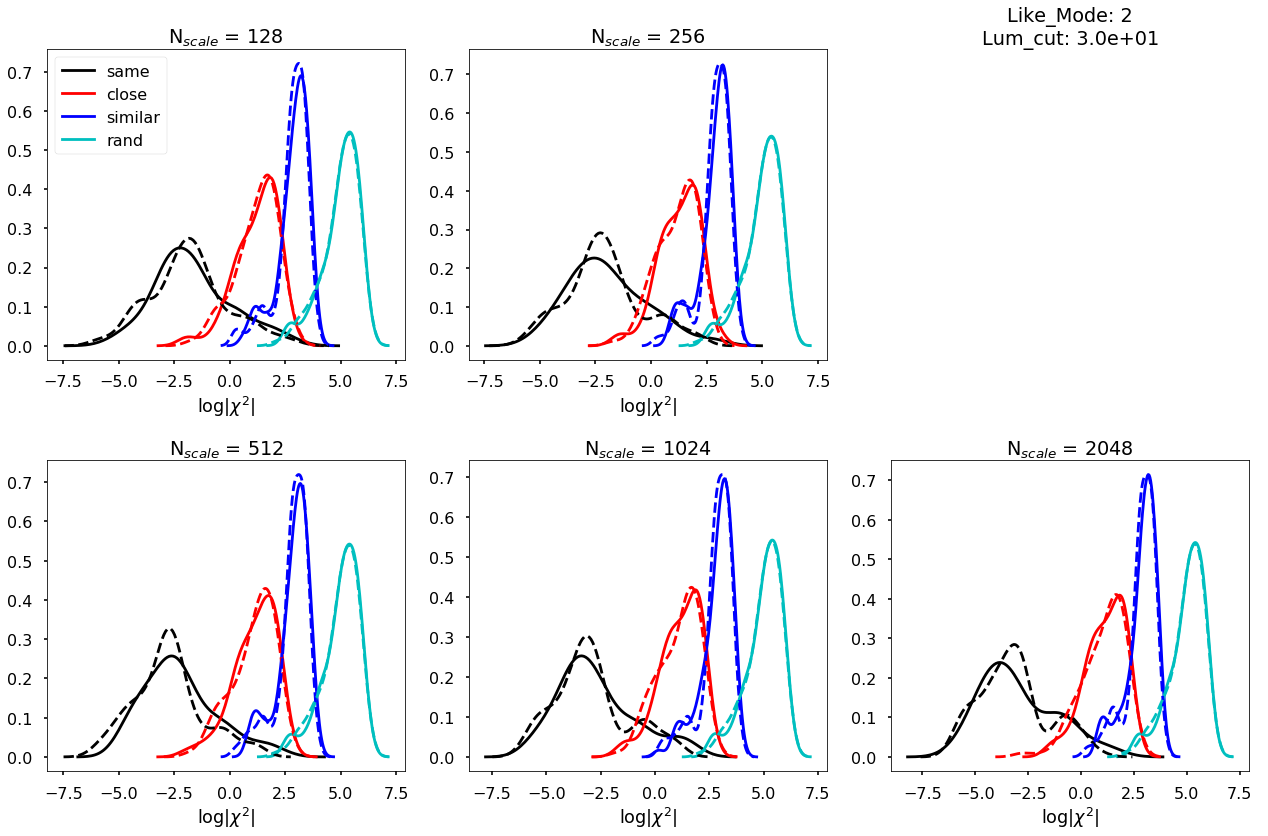

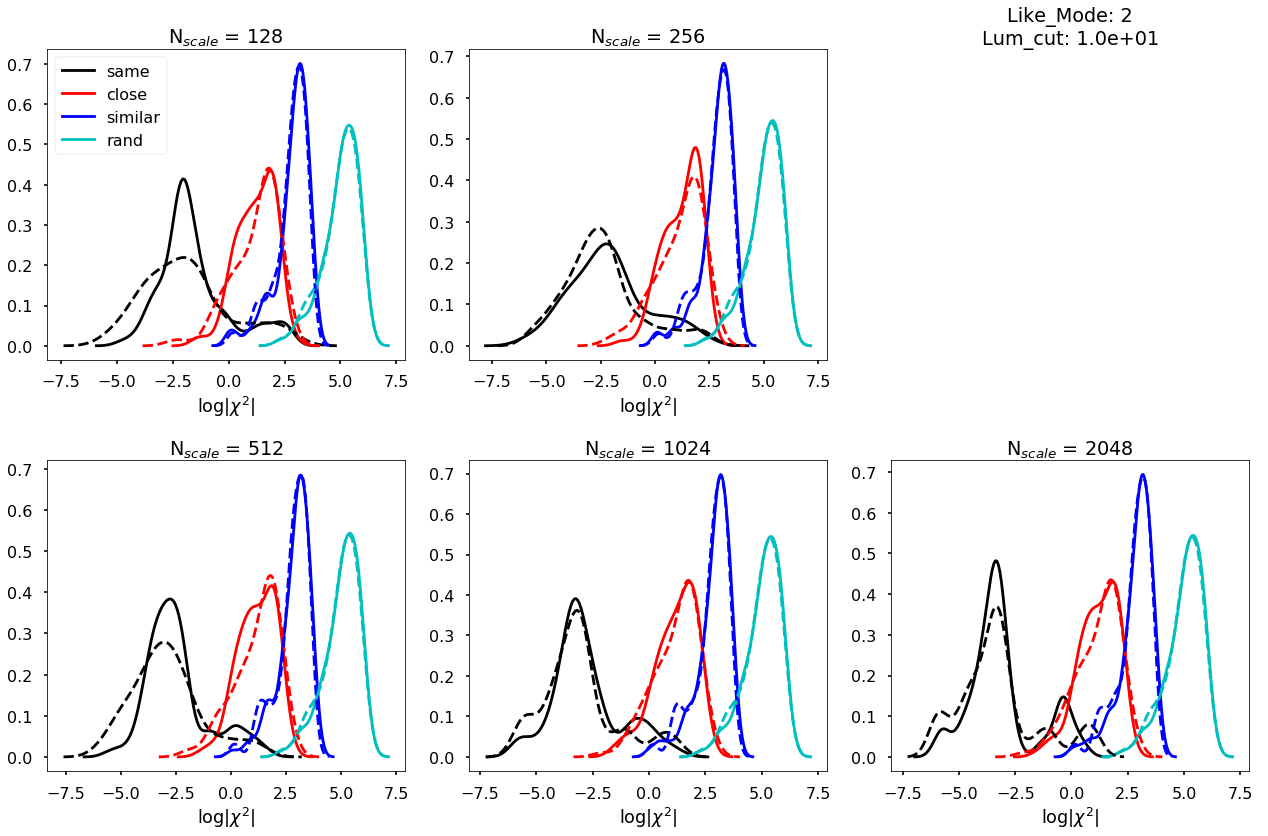

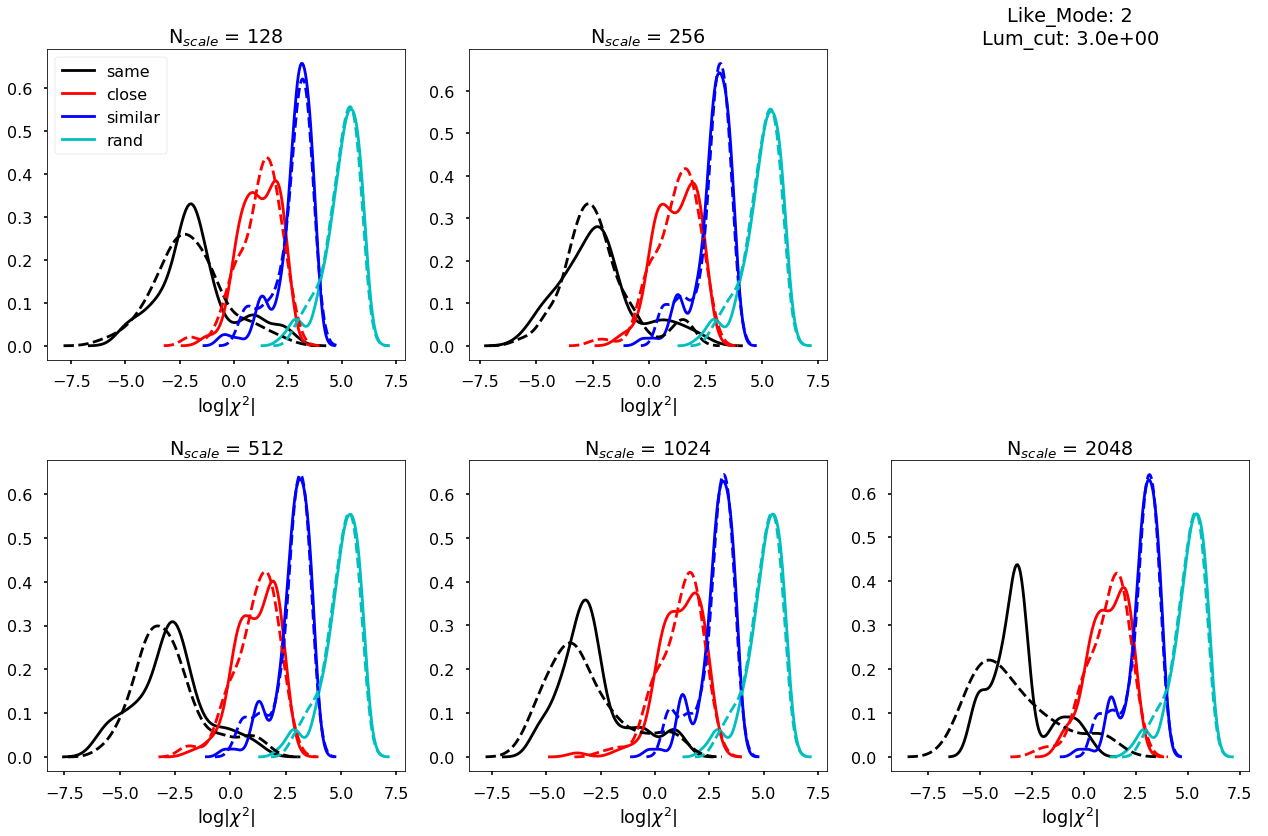

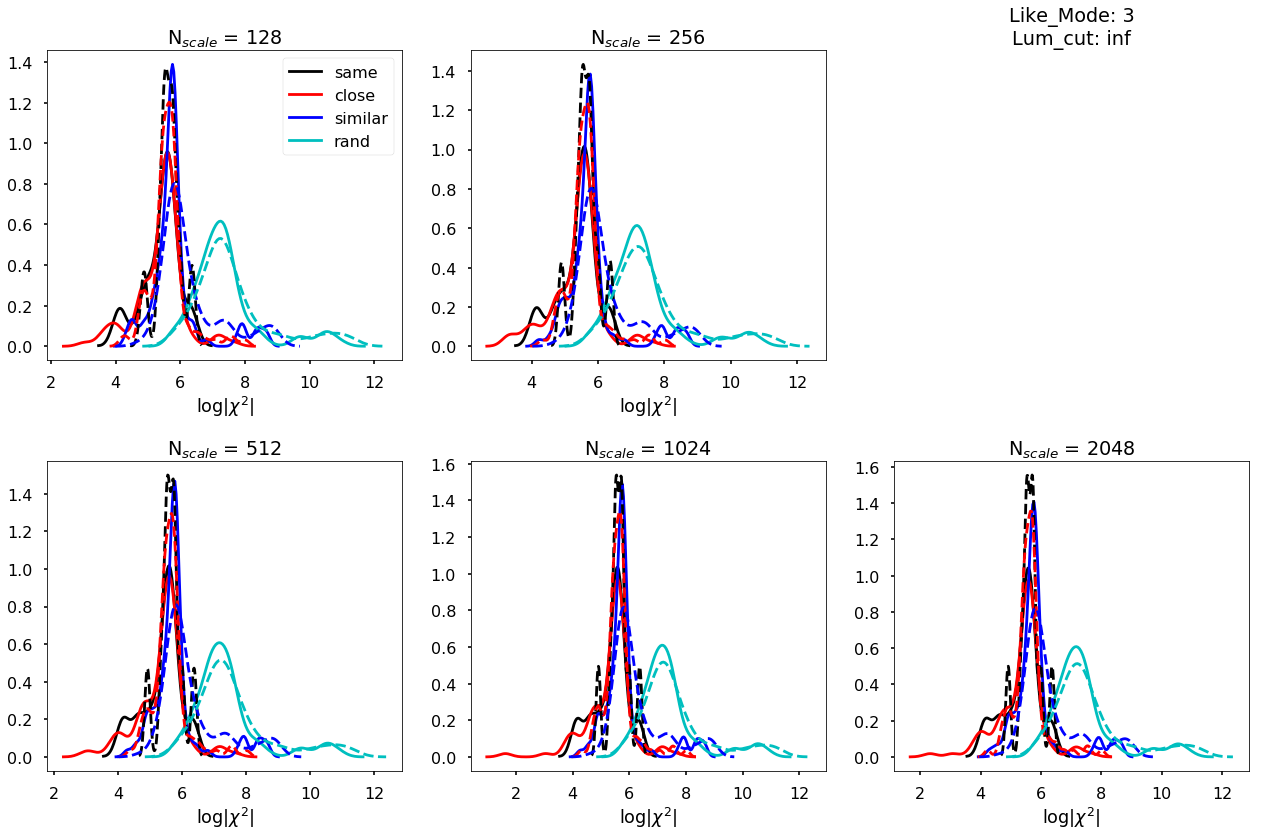

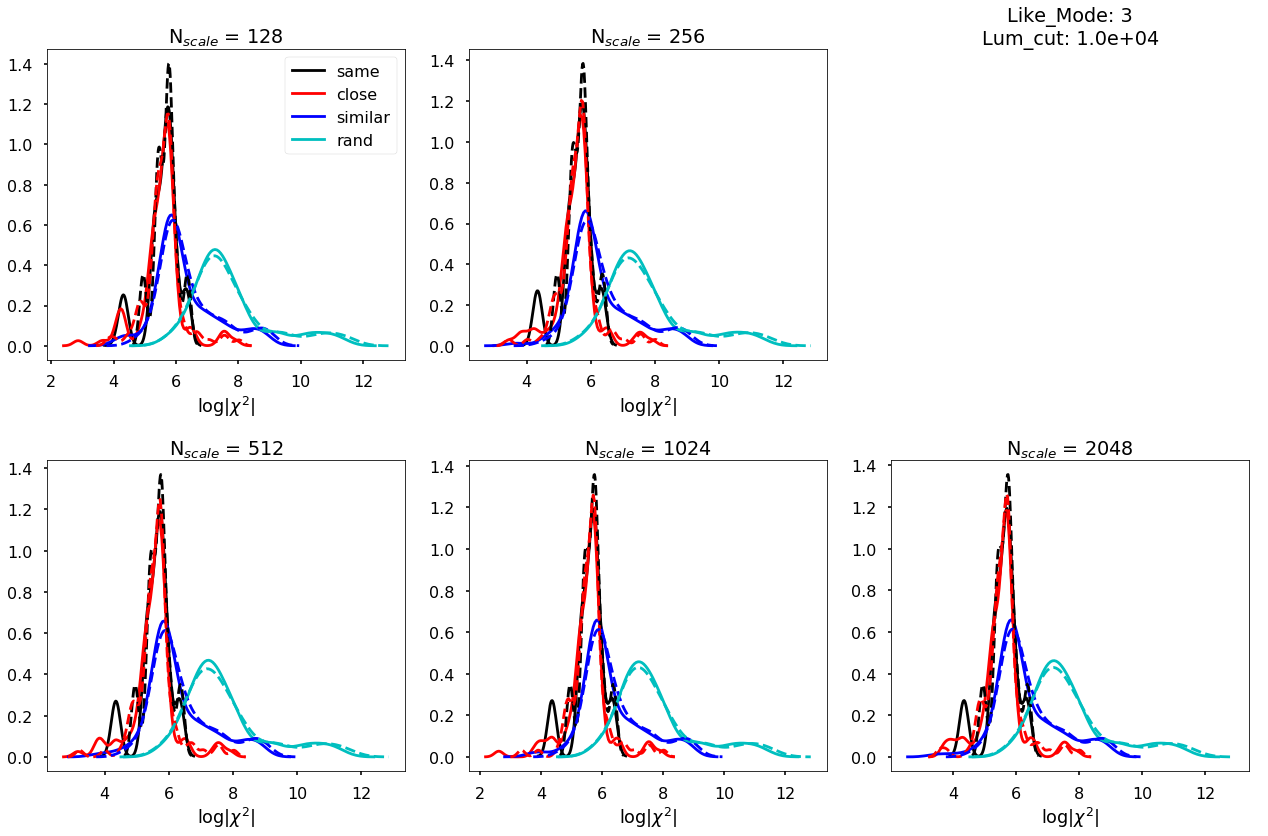

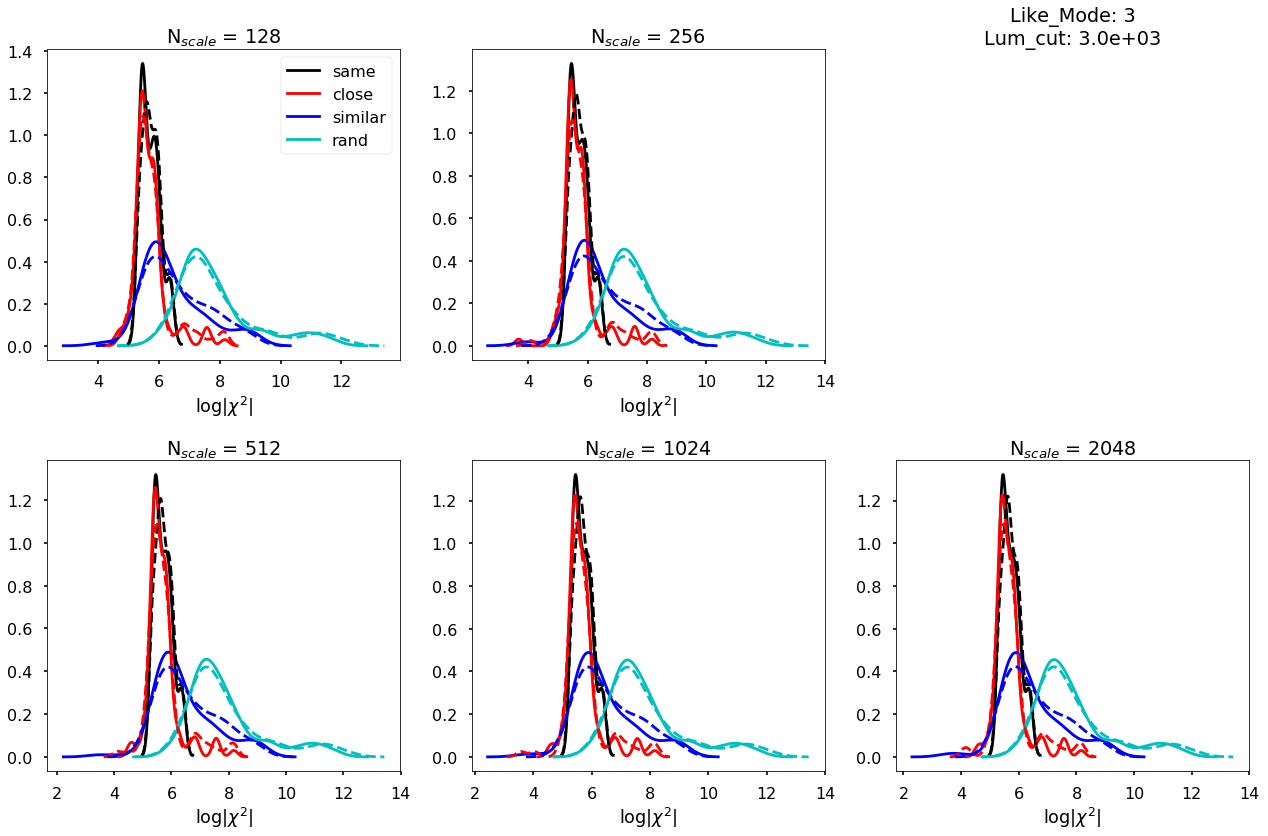

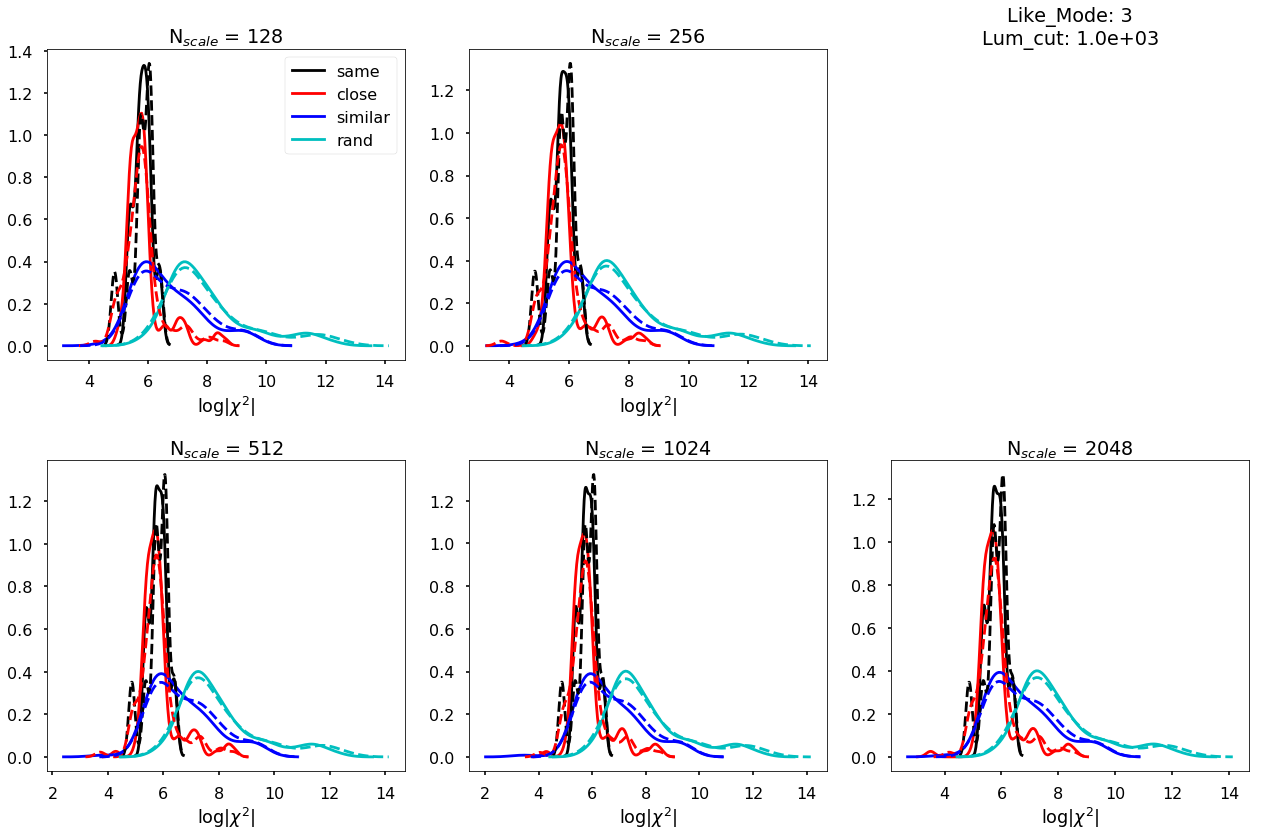

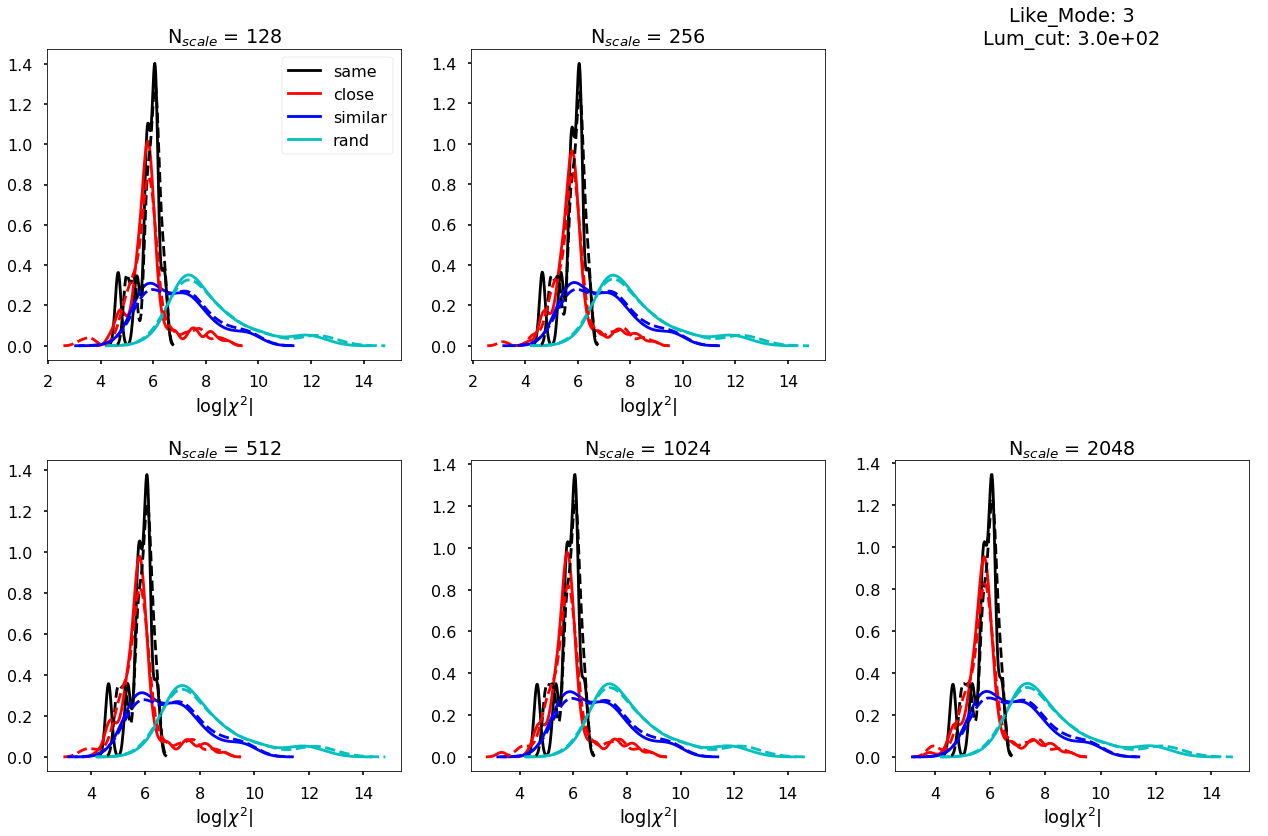

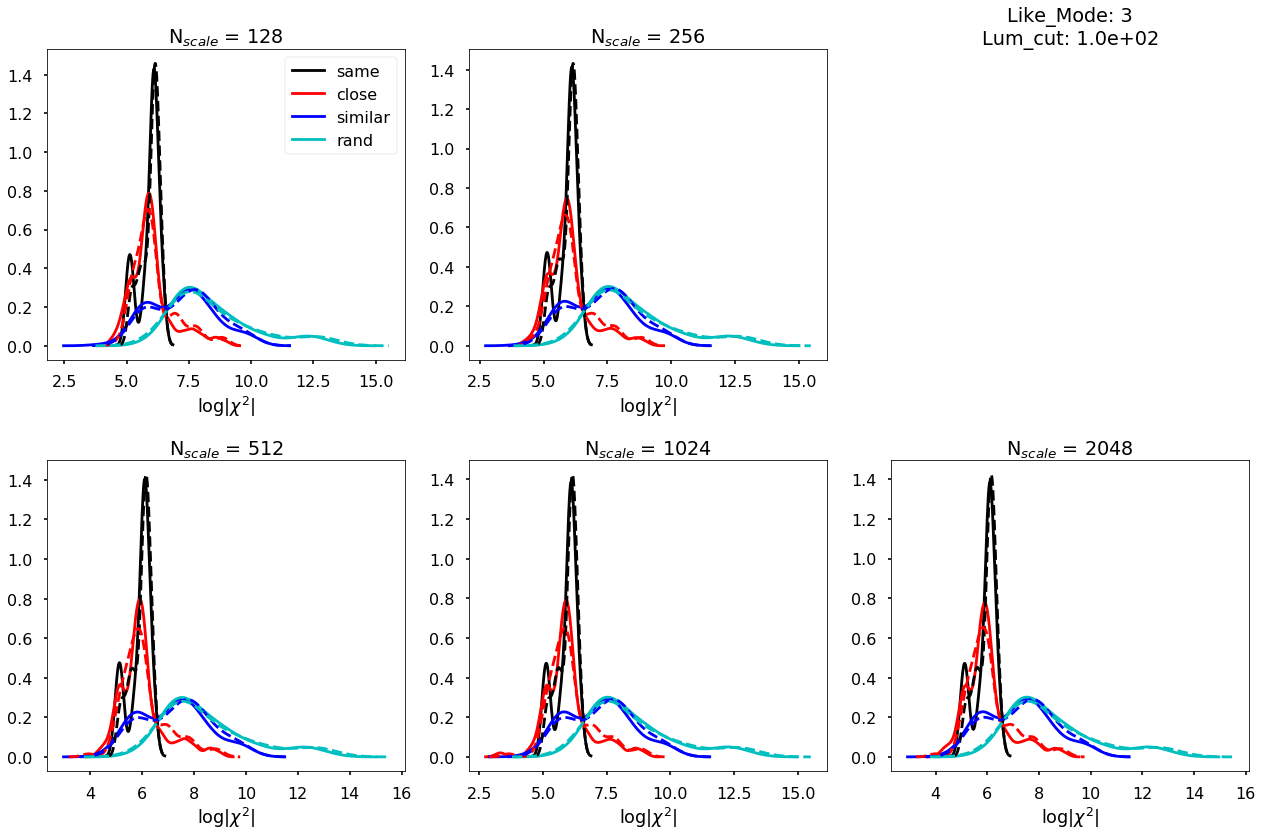

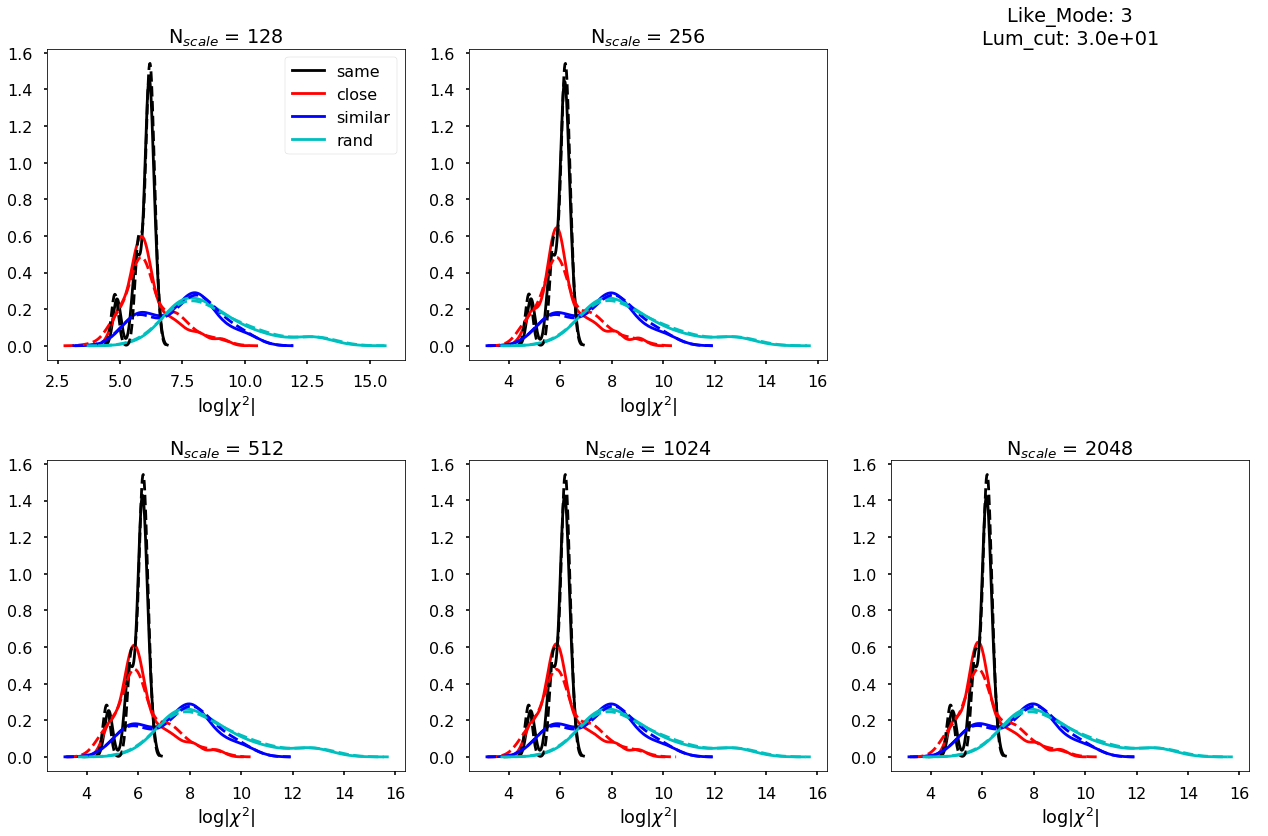

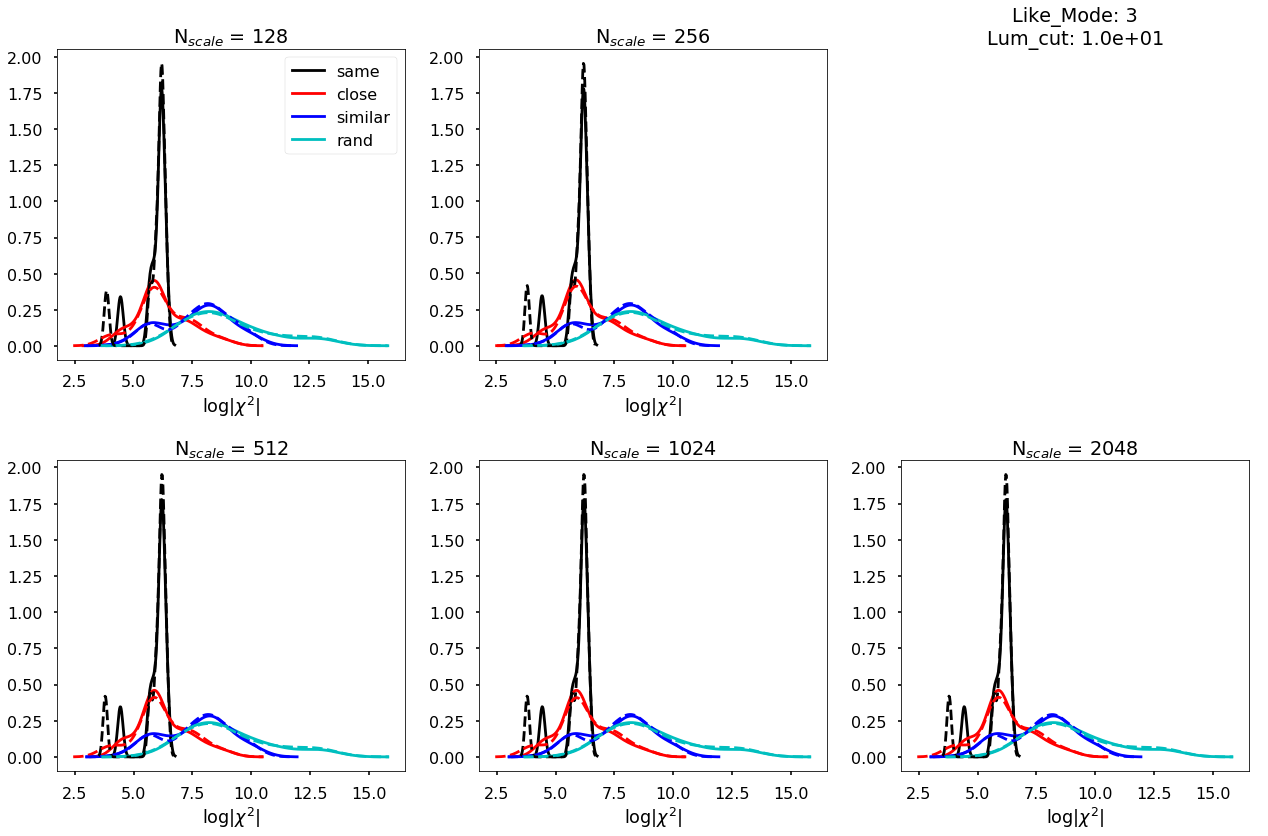

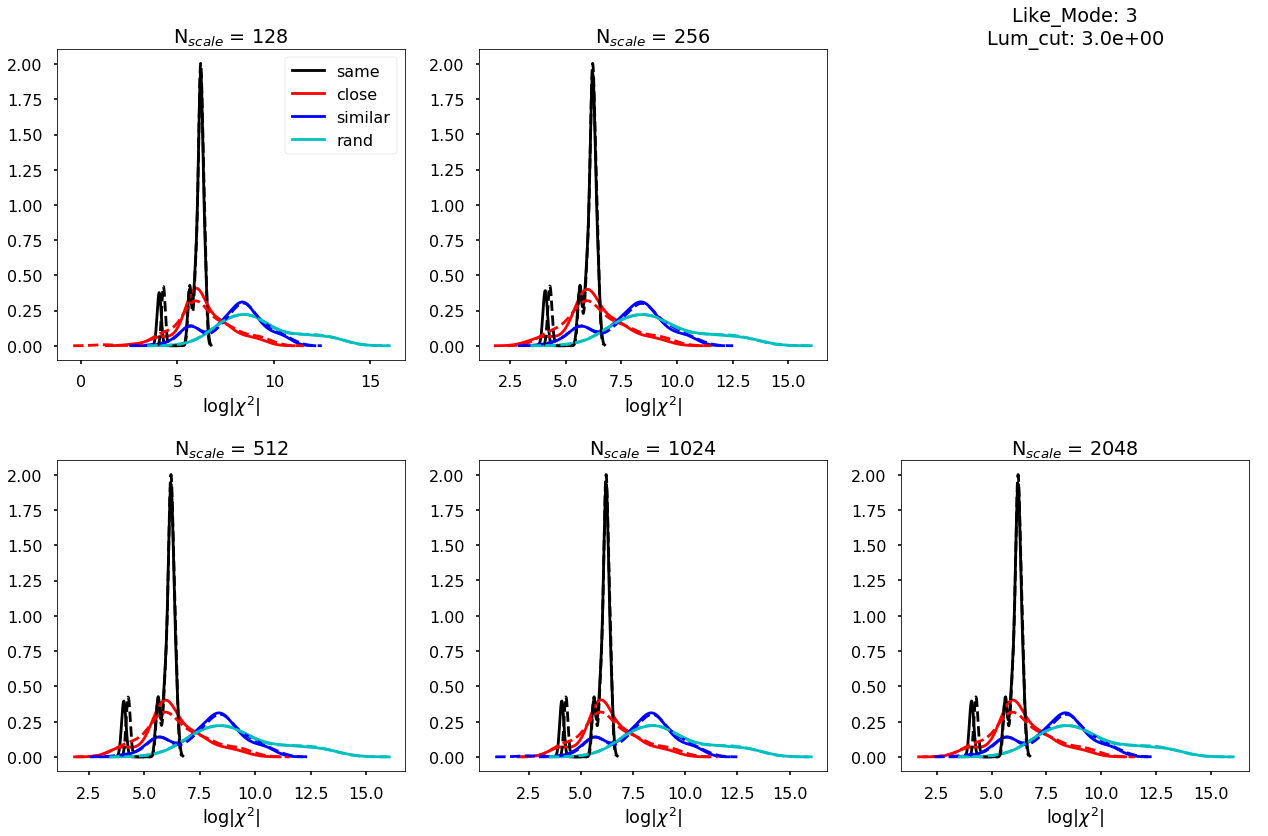

In [23]:
colors = np.array(['k', 'r', 'b', 'c'])
for lm in [0,1,2,3]:
    for lc in df.lum_cut.unique():

        fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(18, 12))
        axes[0,2].set_title('Like_Mode: %d\nLum_cut: %.1e'%(lm, lc))
        axes[0,2].axis('off')
        axes = axes.flatten()
        axes = np.delete(axes, 2)
        for i, N_scale in enumerate(df.N_scale.unique()):
            axis = axes[i]
            mini_df = df[(df.gal_type=='Full')&(df.N_scale==N_scale)&(df.MIST_full)&(df.like_mode==lm)&(df.lum_cut==lc)]
            for i, ct in enumerate(mini_df.compare_type.unique()):
                sns.kdeplot(mini_df[mini_df.compare_type==ct].loglog.values, color=colors[i], ls='-', ax=axis, label=ct)
                #         axis.hist(mini_df[mini_df.compare_type==ct].loglog.values, histtype='step', ls='-', label=ct, color=colors[i], lw=2)
            mini_df = df[(df.gal_type=='Full')&(df.N_scale==N_scale)&(~df.MIST_full)&(df.like_mode==lm)&(df.lum_cut==lc)]
            for i, ct in enumerate(mini_df.compare_type.unique()):
                sns.kdeplot(mini_df[mini_df.compare_type==ct].loglog.values, color=colors[i], ls='--', ax=axis)
                #         axis.hist(mini_df[mini_df.compare_type==ct].loglog.values, histtype='stepfilled', alpha=0.25, zorder=-1, ls='-', color=colors[i], lw=2)
            axis.set_title(r'N$_{scale}$ = '+'%d'%N_scale)
            axis.legend_.remove()
            axis.set_xlabel(r'$\log |\chi^2|$')
        axes[0].legend(loc=0)
        plt.tight_layout()

In [46]:
sorted(10.**df[df.gal_type=='Full'].Npix_data.unique())

[0.1385251981313842,
 7.1103221841108786,
 183.72802644872195,
 459.97726858155903,
 1657.0805888900111,
 4180.3703618452064,
 4649.0798987425533,
 5555.4054431492104,
 49726.139042991927,
 687586.94139228889]

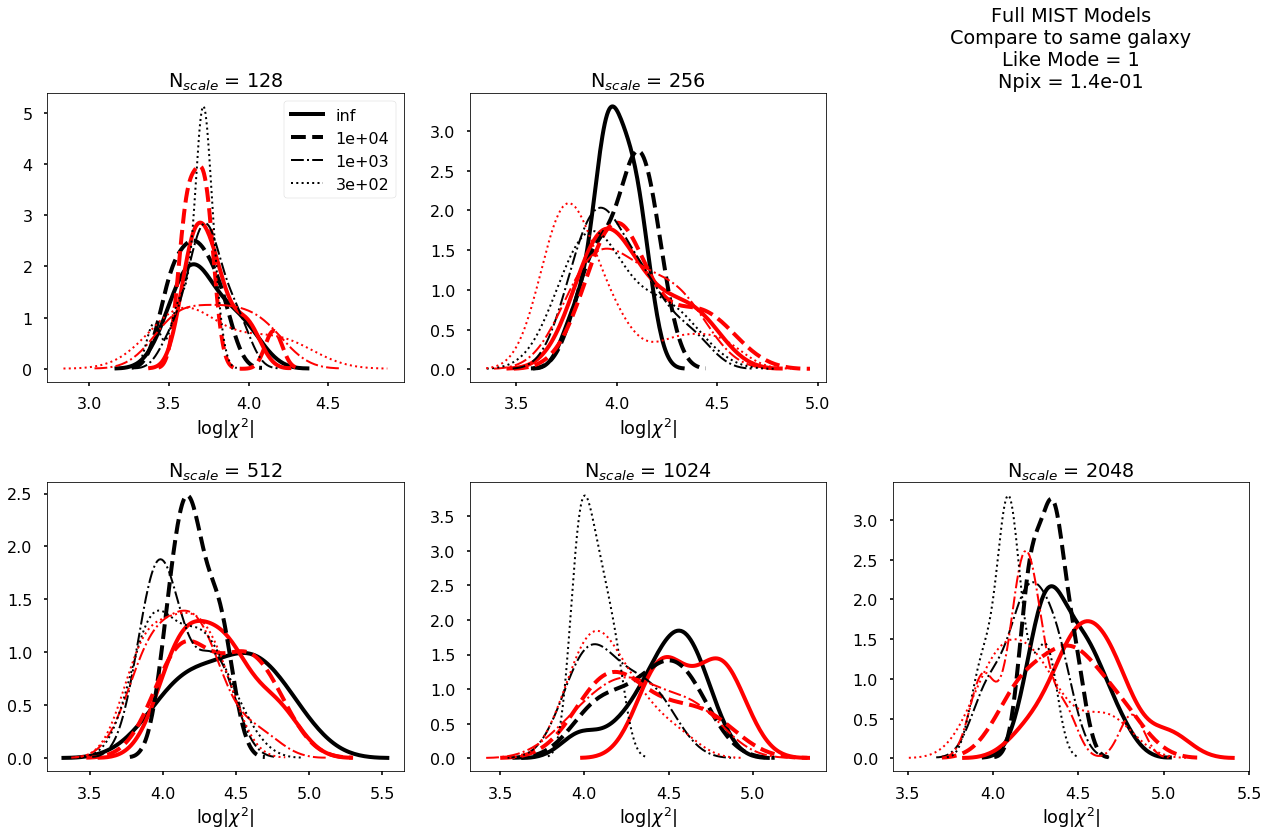

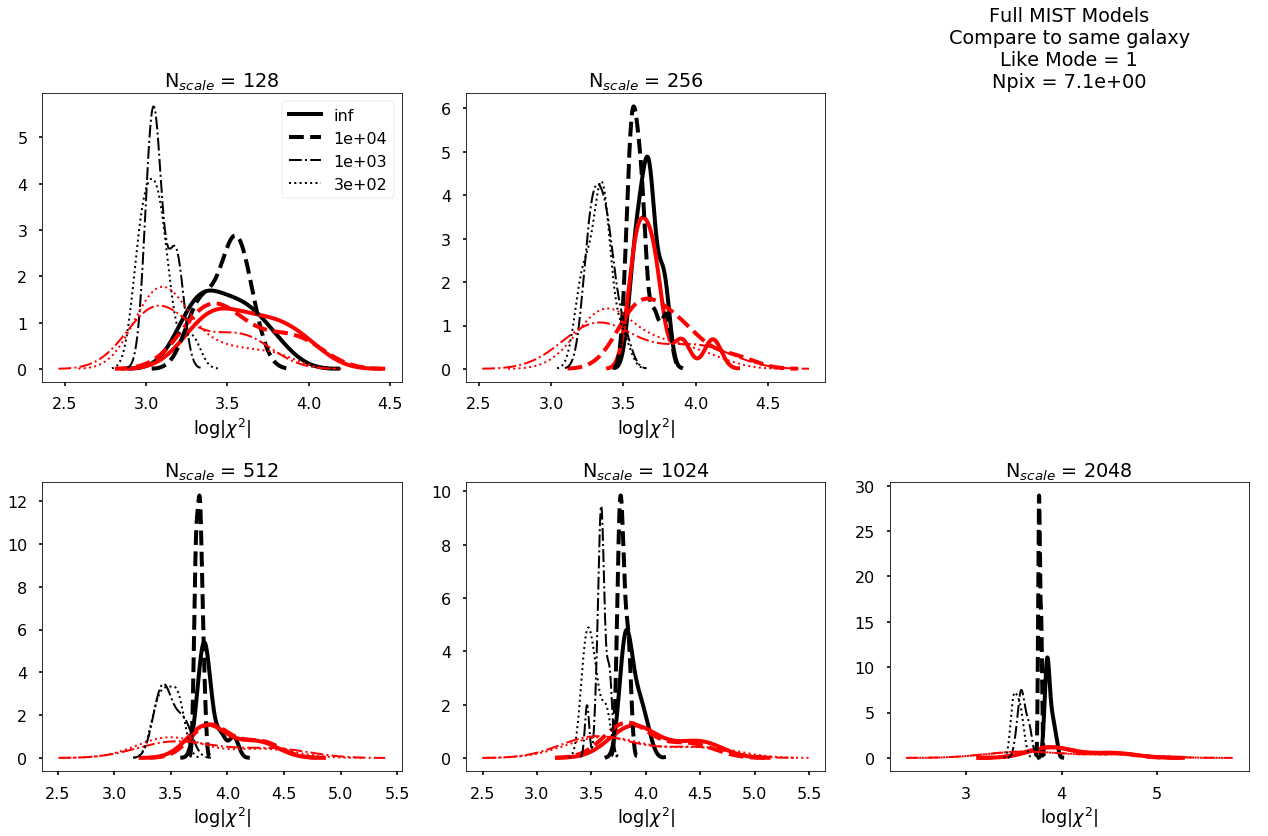

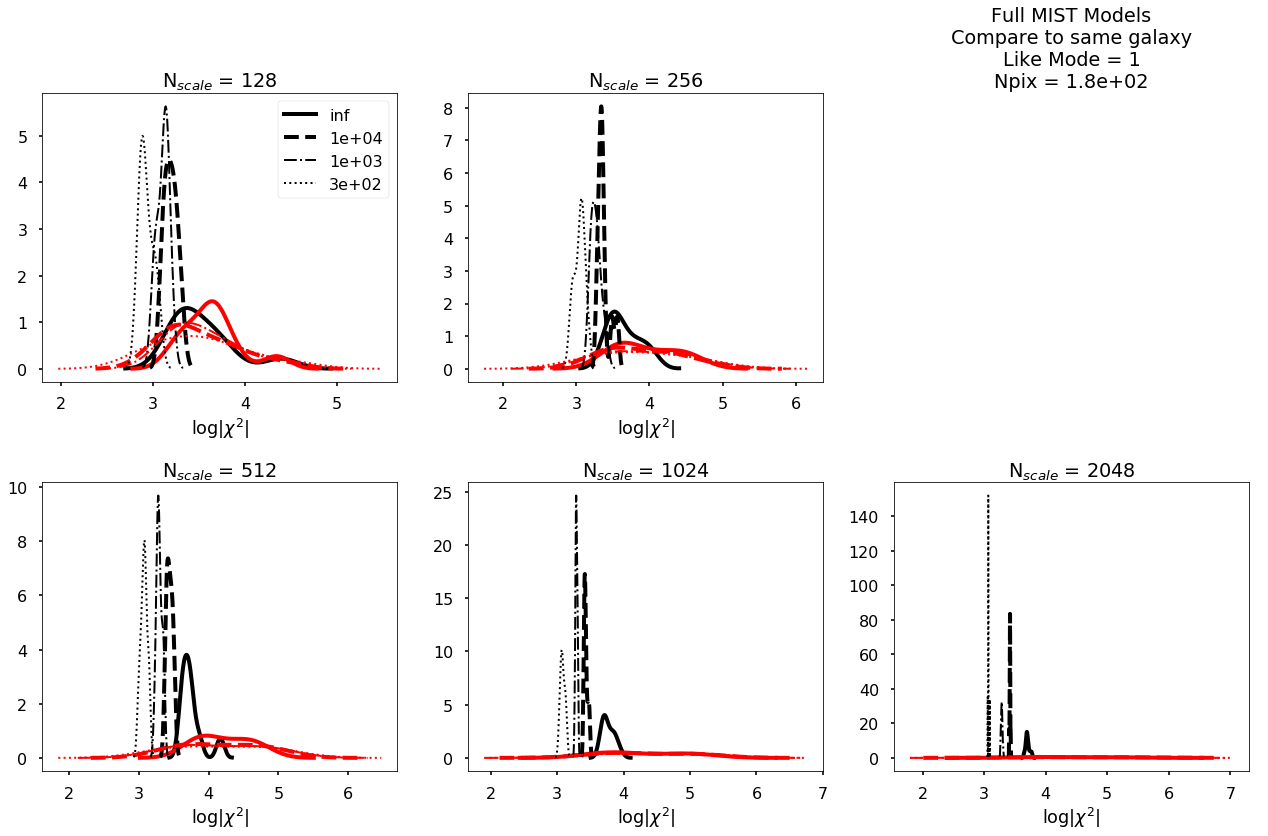

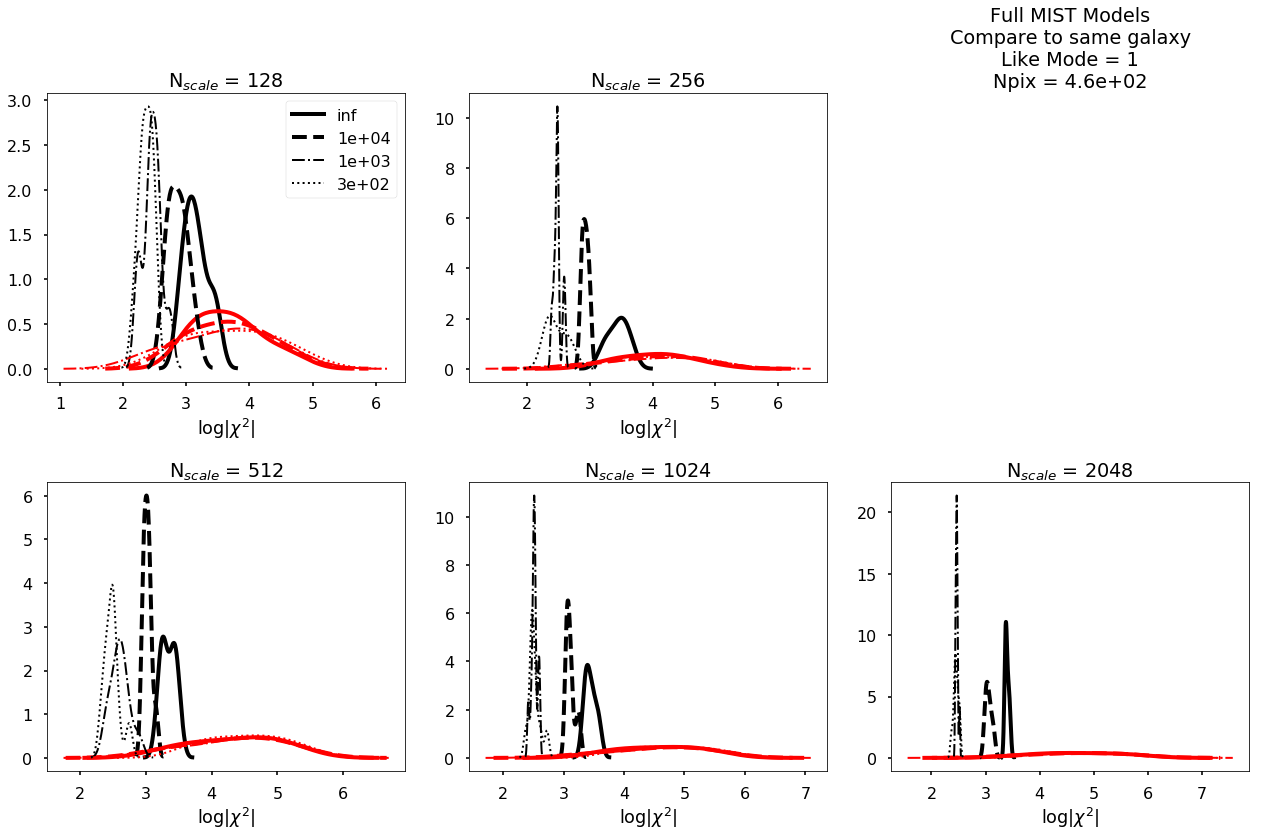

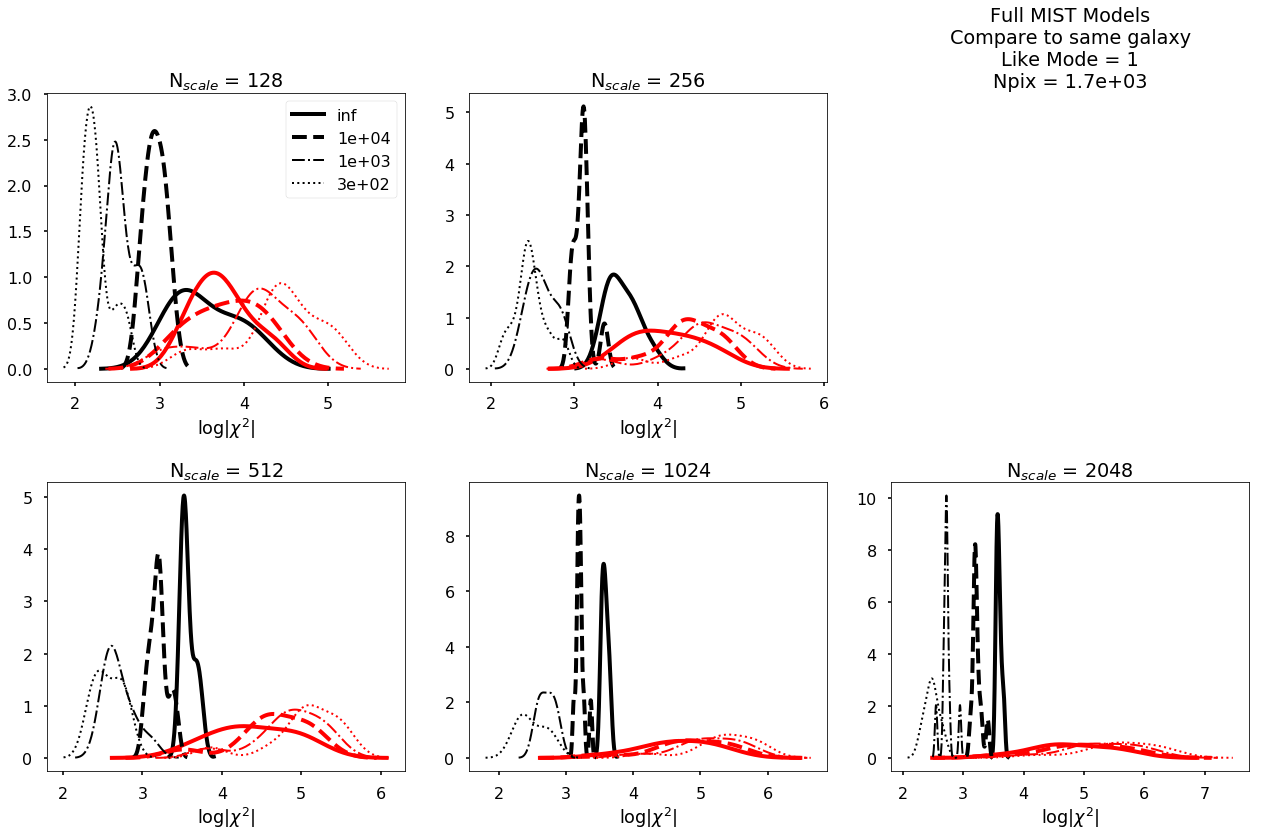

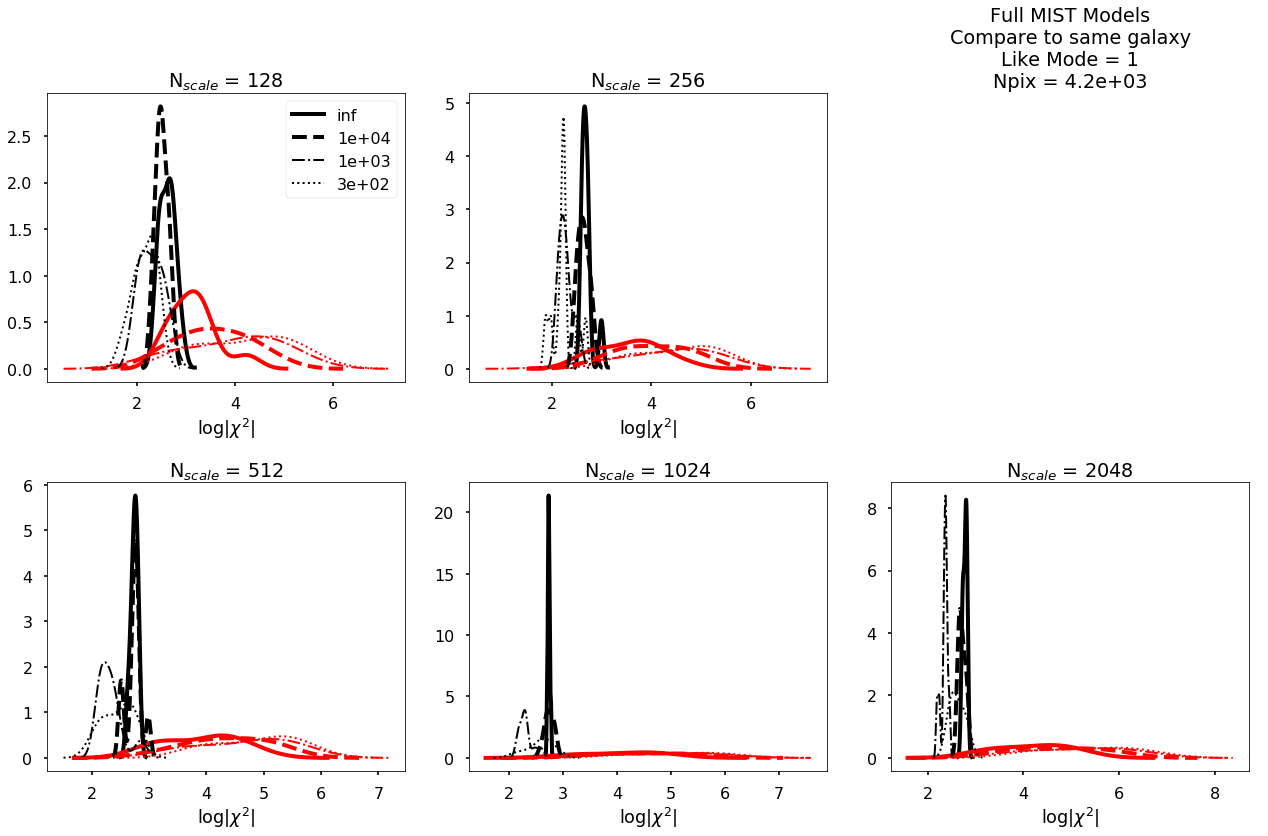

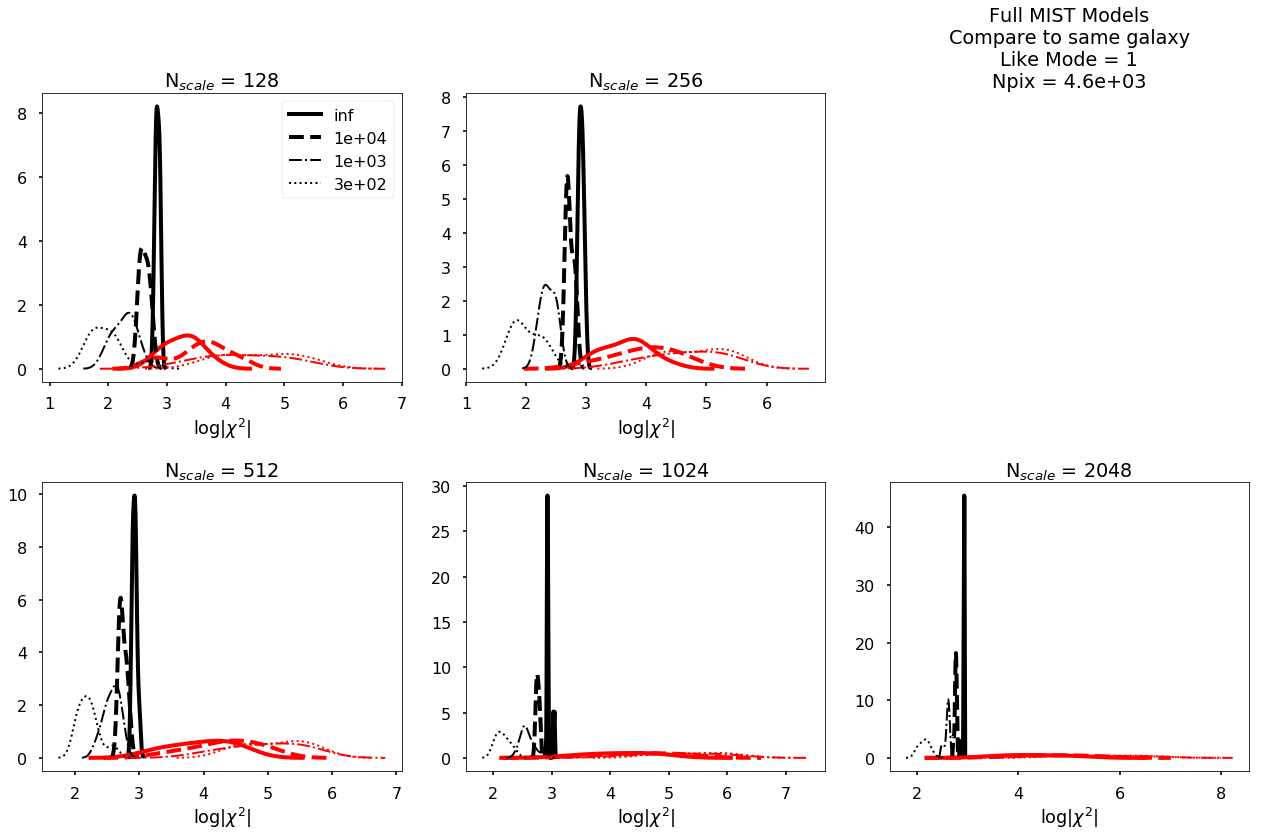

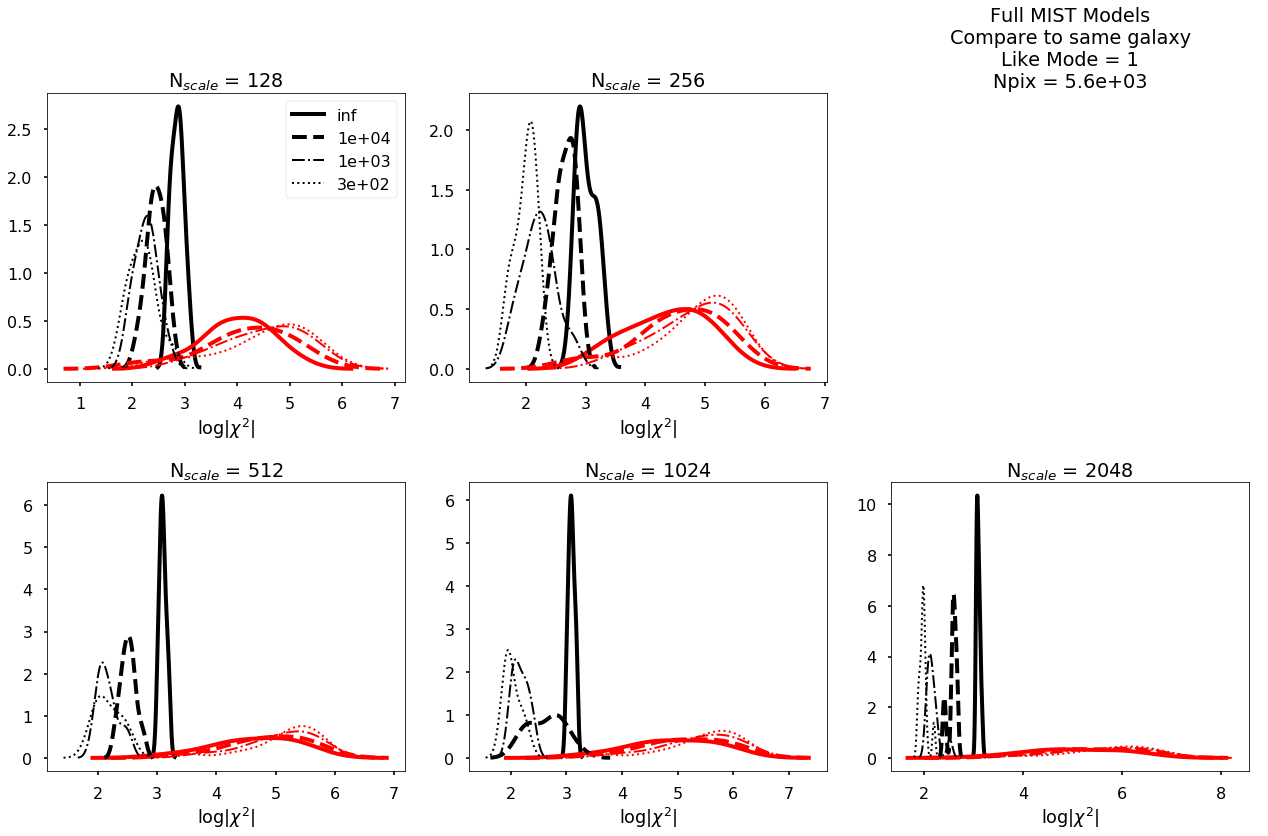

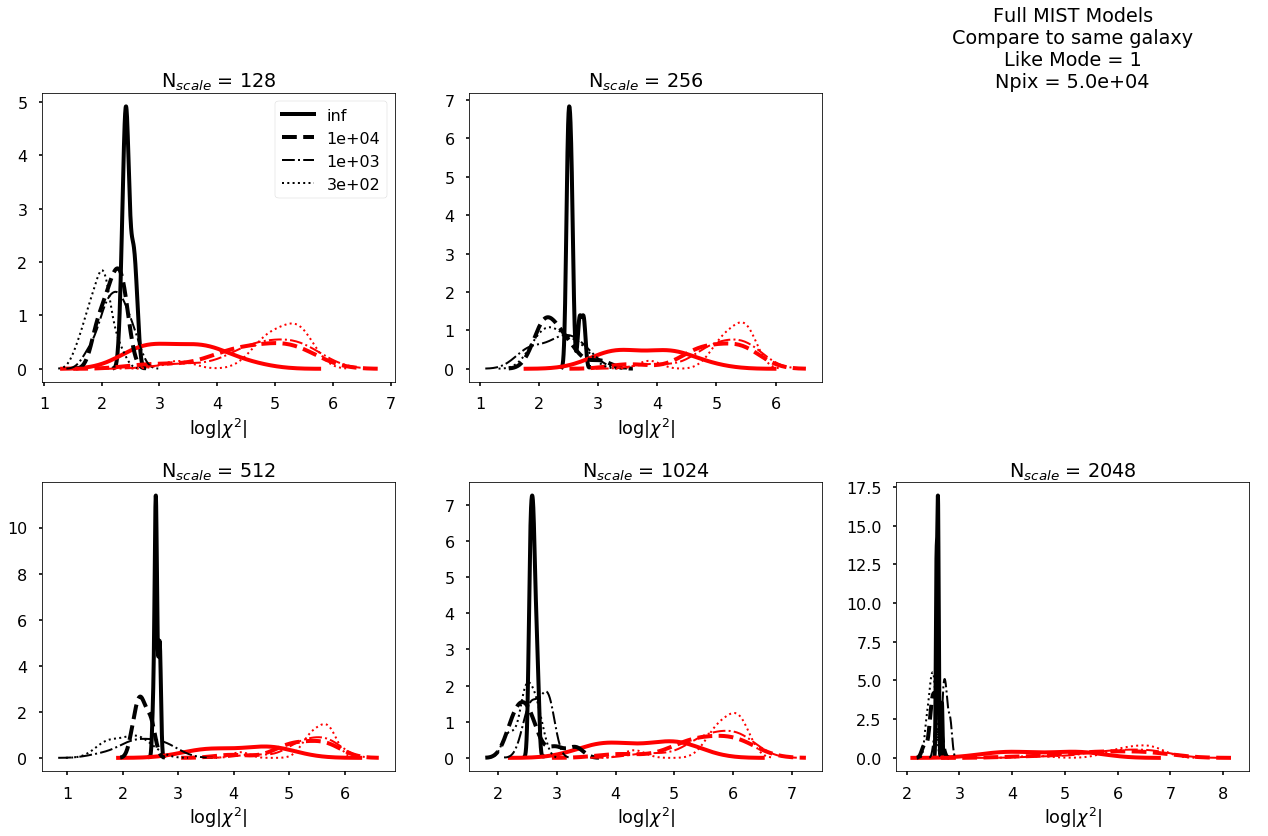

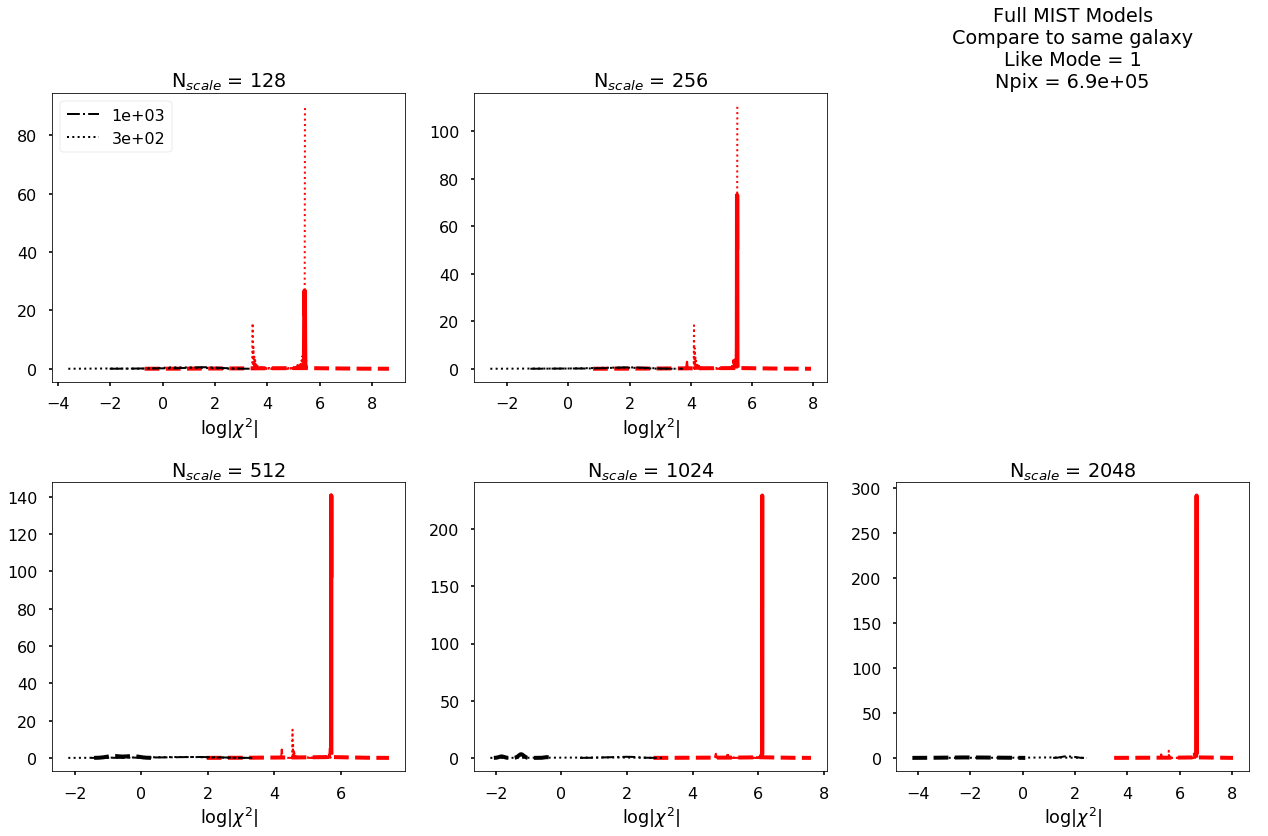

In [53]:
lines = ['-', '--', '-.', ':', '-']
lw = [4., 4., 2., 2., 0.5]

for Np in sorted(df[df.gal_type=='Full'].Npix_data.unique()):
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(18, 12))
    axes[0,2].set_title('Full MIST Models\nCompare to same galaxy\nLike Mode = 1\n' + 'Npix = %.1e'%(10.**Np))
    axes[0,2].axis('off')
    axes = axes.flatten()
    axes = np.delete(axes, 2)

    lm=1
    ct='same'
    for i, N_scale in enumerate(df.N_scale.unique()):
        axis = axes[i]
        mini_df = df[(df.gal_type=='Full')&(df.Npix_data==Np)&(df.N_scale==N_scale)&(df.MIST_full)&(df.like_mode==lm)]
        for i, lc in enumerate([np.inf, 1e4, 1e3, 3e2]):
            temp_df = mini_df[(mini_df.lum_cut==lc)&(mini_df.compare_type==ct)]
            if len(temp_df) > 0:
                sns.kdeplot(mini_df[(mini_df.lum_cut==lc)&(mini_df.compare_type==ct)].loglog.values, color='k', ls=lines[i], ax=axis, lw=lw[i], label='%.0e'%lc)
            sns.kdeplot(mini_df[(mini_df.lum_cut==lc)&(mini_df.compare_type=='close')].loglog.values, color='r', ls=lines[i], ax=axis, lw=lw[i])
        axis.set_title(r'N$_{scale}$ = '+'%d'%N_scale)
        axis.legend_.remove()
        axis.set_xlabel(r'$\log |\chi^2|$')    
#         axis.set_xlim(xmin=0.)
    axes[0].legend(loc=0)
    plt.tight_layout()
# plt.savefig('figures/loglike_lumcut.pdf')

In [31]:
np.unique(mini_df.Npix_data)

array([-0.85847122,  0.85188928,  2.26417541,  2.66273637,  3.21934363,
        3.62121476,  3.66736701,  3.74471576,  4.69658474,  5.83732762])

In [48]:
import matplotlib.image as mpimg

In [49]:
img = mpimg.imread('/Users/bcook/Downloads/DFLel7FUMAA8DiI.jpg')

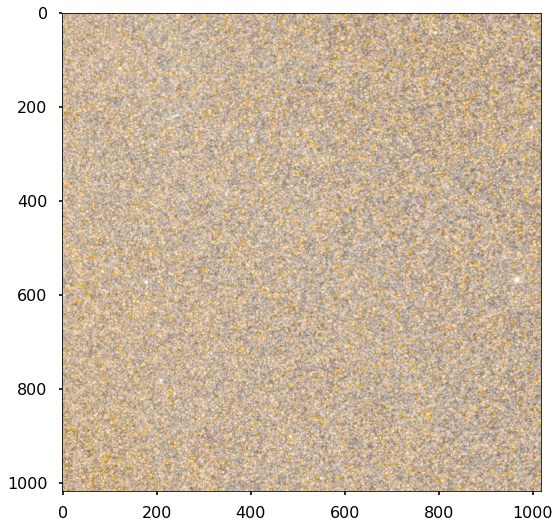

In [51]:
plt.imshow(img)

In [52]:
img

array([[[178, 143, 111],
        [187, 154, 121],
        [191, 162, 128],
        ..., 
        [180, 160, 133],
        [164, 144, 119],
        [160, 142, 118]],

       [[177, 142, 110],
        [184, 151, 118],
        [187, 158, 124],
        ..., 
        [205, 185, 160],
        [186, 166, 141],
        [181, 163, 139]],

       [[185, 152, 121],
        [190, 157, 124],
        [193, 164, 130],
        ..., 
        [216, 196, 171],
        [207, 187, 163],
        [203, 185, 163]],

       ..., 
       [[240, 205, 165],
        [219, 185, 139],
        [194, 158, 106],
        ..., 
        [206, 182, 148],
        [198, 174, 138],
        [191, 167, 129]],

       [[247, 210, 168],
        [227, 191, 143],
        [209, 172, 117],
        ..., 
        [203, 184, 154],
        [191, 172, 140],
        [192, 172, 139]],

       [[247, 210, 166],
        [228, 192, 144],
        [211, 174, 119],
        ..., 
        [192, 176, 151],
        [195, 179, 153],
        [196, 181,